In [2]:
from IPython.display import display
import glob, os
import numpy as np
from rewards.properties import qed as mol_qed, drd2 as mol_drd2, logP as mol_logP
from coma.properties import penalized_logp
from rdkit import Chem
import pickle
from rewards.properties import similarity

def qed(smile):
    return mol_qed(Chem.MolFromSmiles(smile))

def drd2(smile):
    return mol_drd2(Chem.MolFromSmiles(smile))

def logP(smile):
    return mol_logP(Chem.MolFromSmiles(smile))

In [3]:
# Given current idx of smile in list of generated output, finds the file the smile is in. Then it returns the small molecule used to create this smile
def get_start_mol(i, smile):
    traj = pickle.load(open(f"results/eval_on_coma_{PROPERTY_NAME}/{reorder_idx[i//20]}.pickle", 'rb'))["traj"]
    for key in traj:
        if traj[key] == smile:
            return traj[key.split("_")[0]]
    return "CCCC"

In [4]:
drd2_files = ['results/eval_on_coma_drd2/453.pickle', 'results/eval_on_coma_drd2/384.pickle', 'results/eval_on_coma_drd2/787.pickle', 'results/eval_on_coma_drd2/618.pickle', 'results/eval_on_coma_drd2/956.pickle', 'results/eval_on_coma_drd2/382.pickle', 'results/eval_on_coma_drd2/80.pickle', 'results/eval_on_coma_drd2/993.pickle', 'results/eval_on_coma_drd2/31.pickle', 'results/eval_on_coma_drd2/674.pickle', 'results/eval_on_coma_drd2/202.pickle', 'results/eval_on_coma_drd2/338.pickle', 'results/eval_on_coma_drd2/30.pickle', 'results/eval_on_coma_drd2/88.pickle', 'results/eval_on_coma_drd2/339.pickle', 'results/eval_on_coma_drd2/729.pickle', 'results/eval_on_coma_drd2/490.pickle', 'results/eval_on_coma_drd2/227.pickle', 'results/eval_on_coma_drd2/935.pickle', 'results/eval_on_coma_drd2/128.pickle', 'results/eval_on_coma_drd2/883.pickle', 'results/eval_on_coma_drd2/546.pickle', 'results/eval_on_coma_drd2/364.pickle', 'results/eval_on_coma_drd2/259.pickle', 'results/eval_on_coma_drd2/880.pickle', 'results/eval_on_coma_drd2/264.pickle', 'results/eval_on_coma_drd2/949.pickle', 'results/eval_on_coma_drd2/13.pickle', 'results/eval_on_coma_drd2/413.pickle', 'results/eval_on_coma_drd2/33.pickle', 'results/eval_on_coma_drd2/953.pickle', 'results/eval_on_coma_drd2/657.pickle', 'results/eval_on_coma_drd2/852.pickle', 'results/eval_on_coma_drd2/989.pickle', 'results/eval_on_coma_drd2/406.pickle', 'results/eval_on_coma_drd2/257.pickle', 'results/eval_on_coma_drd2/177.pickle', 'results/eval_on_coma_drd2/790.pickle', 'results/eval_on_coma_drd2/147.pickle', 'results/eval_on_coma_drd2/468.pickle', 'results/eval_on_coma_drd2/41.pickle', 'results/eval_on_coma_drd2/212.pickle', 'results/eval_on_coma_drd2/464.pickle', 'results/eval_on_coma_drd2/448.pickle', 'results/eval_on_coma_drd2/354.pickle', 'results/eval_on_coma_drd2/718.pickle', 'results/eval_on_coma_drd2/135.pickle', 'results/eval_on_coma_drd2/168.pickle', 'results/eval_on_coma_drd2/134.pickle', 'results/eval_on_coma_drd2/536.pickle', 'results/eval_on_coma_drd2/475.pickle', 'results/eval_on_coma_drd2/683.pickle', 'results/eval_on_coma_drd2/676.pickle', 'results/eval_on_coma_drd2/698.pickle', 'results/eval_on_coma_drd2/954.pickle', 'results/eval_on_coma_drd2/172.pickle', 'results/eval_on_coma_drd2/895.pickle', 'results/eval_on_coma_drd2/916.pickle', 'results/eval_on_coma_drd2/853.pickle', 'results/eval_on_coma_drd2/218.pickle', 'results/eval_on_coma_drd2/39.pickle', 'results/eval_on_coma_drd2/788.pickle', 'results/eval_on_coma_drd2/604.pickle', 'results/eval_on_coma_drd2/672.pickle', 'results/eval_on_coma_drd2/76.pickle', 'results/eval_on_coma_drd2/564.pickle', 'results/eval_on_coma_drd2/330.pickle', 'results/eval_on_coma_drd2/221.pickle', 'results/eval_on_coma_drd2/154.pickle', 'results/eval_on_coma_drd2/184.pickle', 'results/eval_on_coma_drd2/893.pickle', 'results/eval_on_coma_drd2/556.pickle', 'results/eval_on_coma_drd2/910.pickle', 'results/eval_on_coma_drd2/451.pickle', 'results/eval_on_coma_drd2/214.pickle', 'results/eval_on_coma_drd2/739.pickle', 'results/eval_on_coma_drd2/590.pickle', 'results/eval_on_coma_drd2/748.pickle', 'results/eval_on_coma_drd2/159.pickle', 'results/eval_on_coma_drd2/207.pickle', 'results/eval_on_coma_drd2/986.pickle', 'results/eval_on_coma_drd2/548.pickle', 'results/eval_on_coma_drd2/260.pickle', 'results/eval_on_coma_drd2/734.pickle', 'results/eval_on_coma_drd2/174.pickle', 'results/eval_on_coma_drd2/727.pickle', 'results/eval_on_coma_drd2/492.pickle', 'results/eval_on_coma_drd2/822.pickle', 'results/eval_on_coma_drd2/160.pickle', 'results/eval_on_coma_drd2/744.pickle', 'results/eval_on_coma_drd2/824.pickle', 'results/eval_on_coma_drd2/201.pickle', 'results/eval_on_coma_drd2/28.pickle', 'results/eval_on_coma_drd2/425.pickle', 'results/eval_on_coma_drd2/278.pickle', 'results/eval_on_coma_drd2/622.pickle', 'results/eval_on_coma_drd2/456.pickle', 'results/eval_on_coma_drd2/228.pickle', 'results/eval_on_coma_drd2/476.pickle', 'results/eval_on_coma_drd2/934.pickle', 'results/eval_on_coma_drd2/712.pickle', 'results/eval_on_coma_drd2/275.pickle', 'results/eval_on_coma_drd2/289.pickle', 'results/eval_on_coma_drd2/775.pickle', 'results/eval_on_coma_drd2/251.pickle', 'results/eval_on_coma_drd2/700.pickle', 'results/eval_on_coma_drd2/644.pickle', 'results/eval_on_coma_drd2/324.pickle', 'results/eval_on_coma_drd2/559.pickle', 'results/eval_on_coma_drd2/991.pickle', 'results/eval_on_coma_drd2/690.pickle', 'results/eval_on_coma_drd2/814.pickle', 'results/eval_on_coma_drd2/583.pickle', 'results/eval_on_coma_drd2/374.pickle', 'results/eval_on_coma_drd2/8.pickle', 'results/eval_on_coma_drd2/376.pickle', 'results/eval_on_coma_drd2/801.pickle', 'results/eval_on_coma_drd2/848.pickle', 'results/eval_on_coma_drd2/769.pickle', 'results/eval_on_coma_drd2/905.pickle', 'results/eval_on_coma_drd2/692.pickle', 'results/eval_on_coma_drd2/164.pickle', 'results/eval_on_coma_drd2/512.pickle', 'results/eval_on_coma_drd2/248.pickle', 'results/eval_on_coma_drd2/642.pickle', 'results/eval_on_coma_drd2/671.pickle', 'results/eval_on_coma_drd2/796.pickle', 'results/eval_on_coma_drd2/704.pickle', 'results/eval_on_coma_drd2/424.pickle', 'results/eval_on_coma_drd2/26.pickle', 'results/eval_on_coma_drd2/307.pickle', 'results/eval_on_coma_drd2/900.pickle', 'results/eval_on_coma_drd2/62.pickle', 'results/eval_on_coma_drd2/746.pickle', 'results/eval_on_coma_drd2/139.pickle', 'results/eval_on_coma_drd2/51.pickle', 'results/eval_on_coma_drd2/745.pickle', 'results/eval_on_coma_drd2/162.pickle', 'results/eval_on_coma_drd2/7.pickle', 'results/eval_on_coma_drd2/36.pickle', 'results/eval_on_coma_drd2/99.pickle', 'results/eval_on_coma_drd2/165.pickle', 'results/eval_on_coma_drd2/387.pickle', 'results/eval_on_coma_drd2/694.pickle', 'results/eval_on_coma_drd2/948.pickle', 'results/eval_on_coma_drd2/754.pickle', 'results/eval_on_coma_drd2/779.pickle', 'results/eval_on_coma_drd2/47.pickle', 'results/eval_on_coma_drd2/545.pickle', 'results/eval_on_coma_drd2/572.pickle', 'results/eval_on_coma_drd2/237.pickle', 'results/eval_on_coma_drd2/473.pickle', 'results/eval_on_coma_drd2/653.pickle', 'results/eval_on_coma_drd2/358.pickle', 'results/eval_on_coma_drd2/740.pickle', 'results/eval_on_coma_drd2/967.pickle', 'results/eval_on_coma_drd2/765.pickle', 'results/eval_on_coma_drd2/161.pickle', 'results/eval_on_coma_drd2/641.pickle', 'results/eval_on_coma_drd2/922.pickle', 'results/eval_on_coma_drd2/743.pickle', 'results/eval_on_coma_drd2/503.pickle', 'results/eval_on_coma_drd2/480.pickle', 'results/eval_on_coma_drd2/865.pickle', 'results/eval_on_coma_drd2/810.pickle', 'results/eval_on_coma_drd2/509.pickle', 'results/eval_on_coma_drd2/582.pickle', 'results/eval_on_coma_drd2/736.pickle', 'results/eval_on_coma_drd2/722.pickle', 'results/eval_on_coma_drd2/78.pickle', 'results/eval_on_coma_drd2/615.pickle', 'results/eval_on_coma_drd2/774.pickle', 'results/eval_on_coma_drd2/843.pickle', 'results/eval_on_coma_drd2/119.pickle', 'results/eval_on_coma_drd2/964.pickle', 'results/eval_on_coma_drd2/808.pickle', 'results/eval_on_coma_drd2/540.pickle', 'results/eval_on_coma_drd2/158.pickle', 'results/eval_on_coma_drd2/557.pickle', 'results/eval_on_coma_drd2/112.pickle', 'results/eval_on_coma_drd2/939.pickle', 'results/eval_on_coma_drd2/219.pickle', 'results/eval_on_coma_drd2/352.pickle', 'results/eval_on_coma_drd2/975.pickle', 'results/eval_on_coma_drd2/714.pickle', 'results/eval_on_coma_drd2/894.pickle', 'results/eval_on_coma_drd2/702.pickle', 'results/eval_on_coma_drd2/612.pickle', 'results/eval_on_coma_drd2/311.pickle', 'results/eval_on_coma_drd2/650.pickle', 'results/eval_on_coma_drd2/106.pickle', 'results/eval_on_coma_drd2/689.pickle', 'results/eval_on_coma_drd2/763.pickle', 'results/eval_on_coma_drd2/122.pickle', 'results/eval_on_coma_drd2/373.pickle', 'results/eval_on_coma_drd2/959.pickle', 'results/eval_on_coma_drd2/554.pickle', 'results/eval_on_coma_drd2/711.pickle', 'results/eval_on_coma_drd2/699.pickle', 'results/eval_on_coma_drd2/319.pickle', 'results/eval_on_coma_drd2/871.pickle', 'results/eval_on_coma_drd2/663.pickle', 'results/eval_on_coma_drd2/866.pickle', 'results/eval_on_coma_drd2/820.pickle', 'results/eval_on_coma_drd2/562.pickle', 'results/eval_on_coma_drd2/397.pickle', 'results/eval_on_coma_drd2/483.pickle', 'results/eval_on_coma_drd2/86.pickle', 'results/eval_on_coma_drd2/241.pickle', 'results/eval_on_coma_drd2/756.pickle', 'results/eval_on_coma_drd2/629.pickle', 'results/eval_on_coma_drd2/494.pickle', 'results/eval_on_coma_drd2/879.pickle', 'results/eval_on_coma_drd2/210.pickle', 'results/eval_on_coma_drd2/944.pickle', 'results/eval_on_coma_drd2/462.pickle', 'results/eval_on_coma_drd2/867.pickle', 'results/eval_on_coma_drd2/372.pickle', 'results/eval_on_coma_drd2/204.pickle', 'results/eval_on_coma_drd2/666.pickle', 'results/eval_on_coma_drd2/385.pickle', 'results/eval_on_coma_drd2/703.pickle', 'results/eval_on_coma_drd2/685.pickle', 'results/eval_on_coma_drd2/962.pickle', 'results/eval_on_coma_drd2/617.pickle', 'results/eval_on_coma_drd2/469.pickle', 'results/eval_on_coma_drd2/329.pickle', 'results/eval_on_coma_drd2/120.pickle', 'results/eval_on_coma_drd2/171.pickle', 'results/eval_on_coma_drd2/370.pickle', 'results/eval_on_coma_drd2/353.pickle', 'results/eval_on_coma_drd2/778.pickle', 'results/eval_on_coma_drd2/941.pickle', 'results/eval_on_coma_drd2/445.pickle', 'results/eval_on_coma_drd2/999.pickle', 'results/eval_on_coma_drd2/179.pickle', 'results/eval_on_coma_drd2/957.pickle', 'results/eval_on_coma_drd2/270.pickle', 'results/eval_on_coma_drd2/856.pickle', 'results/eval_on_coma_drd2/888.pickle', 'results/eval_on_coma_drd2/648.pickle', 'results/eval_on_coma_drd2/732.pickle', 'results/eval_on_coma_drd2/44.pickle', 'results/eval_on_coma_drd2/898.pickle', 'results/eval_on_coma_drd2/799.pickle', 'results/eval_on_coma_drd2/834.pickle', 'results/eval_on_coma_drd2/903.pickle', 'results/eval_on_coma_drd2/15.pickle', 'results/eval_on_coma_drd2/616.pickle', 'results/eval_on_coma_drd2/118.pickle', 'results/eval_on_coma_drd2/602.pickle', 'results/eval_on_coma_drd2/891.pickle', 'results/eval_on_coma_drd2/74.pickle', 'results/eval_on_coma_drd2/767.pickle', 'results/eval_on_coma_drd2/107.pickle', 'results/eval_on_coma_drd2/531.pickle', 'results/eval_on_coma_drd2/896.pickle', 'results/eval_on_coma_drd2/288.pickle', 'results/eval_on_coma_drd2/124.pickle', 'results/eval_on_coma_drd2/455.pickle', 'results/eval_on_coma_drd2/284.pickle', 'results/eval_on_coma_drd2/661.pickle', 'results/eval_on_coma_drd2/687.pickle', 'results/eval_on_coma_drd2/741.pickle', 'results/eval_on_coma_drd2/553.pickle', 'results/eval_on_coma_drd2/669.pickle', 'results/eval_on_coma_drd2/93.pickle', 'results/eval_on_coma_drd2/392.pickle', 'results/eval_on_coma_drd2/565.pickle', 'results/eval_on_coma_drd2/437.pickle', 'results/eval_on_coma_drd2/720.pickle', 'results/eval_on_coma_drd2/943.pickle', 'results/eval_on_coma_drd2/929.pickle', 'results/eval_on_coma_drd2/940.pickle', 'results/eval_on_coma_drd2/575.pickle', 'results/eval_on_coma_drd2/982.pickle', 'results/eval_on_coma_drd2/529.pickle', 'results/eval_on_coma_drd2/359.pickle', 'results/eval_on_coma_drd2/466.pickle', 'results/eval_on_coma_drd2/654.pickle', 'results/eval_on_coma_drd2/793.pickle', 'results/eval_on_coma_drd2/596.pickle', 'results/eval_on_coma_drd2/269.pickle', 'results/eval_on_coma_drd2/213.pickle', 'results/eval_on_coma_drd2/84.pickle', 'results/eval_on_coma_drd2/520.pickle', 'results/eval_on_coma_drd2/821.pickle', 'results/eval_on_coma_drd2/958.pickle', 'results/eval_on_coma_drd2/527.pickle', 'results/eval_on_coma_drd2/924.pickle', 'results/eval_on_coma_drd2/481.pickle', 'results/eval_on_coma_drd2/533.pickle', 'results/eval_on_coma_drd2/20.pickle', 'results/eval_on_coma_drd2/584.pickle', 'results/eval_on_coma_drd2/346.pickle', 'results/eval_on_coma_drd2/505.pickle', 'results/eval_on_coma_drd2/32.pickle', 'results/eval_on_coma_drd2/2.pickle', 'results/eval_on_coma_drd2/190.pickle', 'results/eval_on_coma_drd2/230.pickle', 'results/eval_on_coma_drd2/141.pickle', 'results/eval_on_coma_drd2/143.pickle', 'results/eval_on_coma_drd2/660.pickle', 'results/eval_on_coma_drd2/942.pickle', 'results/eval_on_coma_drd2/258.pickle', 'results/eval_on_coma_drd2/988.pickle', 'results/eval_on_coma_drd2/470.pickle', 'results/eval_on_coma_drd2/313.pickle', 'results/eval_on_coma_drd2/751.pickle', 'results/eval_on_coma_drd2/206.pickle', 'results/eval_on_coma_drd2/229.pickle', 'results/eval_on_coma_drd2/996.pickle', 'results/eval_on_coma_drd2/21.pickle', 'results/eval_on_coma_drd2/530.pickle', 'results/eval_on_coma_drd2/344.pickle', 'results/eval_on_coma_drd2/797.pickle', 'results/eval_on_coma_drd2/923.pickle', 'results/eval_on_coma_drd2/72.pickle', 'results/eval_on_coma_drd2/897.pickle', 'results/eval_on_coma_drd2/987.pickle', 'results/eval_on_coma_drd2/341.pickle', 'results/eval_on_coma_drd2/920.pickle', 'results/eval_on_coma_drd2/973.pickle', 'results/eval_on_coma_drd2/274.pickle', 'results/eval_on_coma_drd2/966.pickle', 'results/eval_on_coma_drd2/132.pickle', 'results/eval_on_coma_drd2/68.pickle', 'results/eval_on_coma_drd2/881.pickle', 'results/eval_on_coma_drd2/350.pickle', 'results/eval_on_coma_drd2/497.pickle', 'results/eval_on_coma_drd2/684.pickle', 'results/eval_on_coma_drd2/60.pickle', 'results/eval_on_coma_drd2/342.pickle', 'results/eval_on_coma_drd2/127.pickle', 'results/eval_on_coma_drd2/800.pickle', 'results/eval_on_coma_drd2/390.pickle', 'results/eval_on_coma_drd2/4.pickle', 'results/eval_on_coma_drd2/71.pickle', 'results/eval_on_coma_drd2/538.pickle', 'results/eval_on_coma_drd2/912.pickle', 'results/eval_on_coma_drd2/163.pickle', 'results/eval_on_coma_drd2/832.pickle', 'results/eval_on_coma_drd2/794.pickle', 'results/eval_on_coma_drd2/304.pickle', 'results/eval_on_coma_drd2/889.pickle', 'results/eval_on_coma_drd2/614.pickle', 'results/eval_on_coma_drd2/357.pickle', 'results/eval_on_coma_drd2/266.pickle', 'results/eval_on_coma_drd2/782.pickle', 'results/eval_on_coma_drd2/560.pickle', 'results/eval_on_coma_drd2/411.pickle', 'results/eval_on_coma_drd2/40.pickle', 'results/eval_on_coma_drd2/678.pickle', 'results/eval_on_coma_drd2/850.pickle', 'results/eval_on_coma_drd2/569.pickle', 'results/eval_on_coma_drd2/936.pickle', 'results/eval_on_coma_drd2/911.pickle', 'results/eval_on_coma_drd2/573.pickle', 'results/eval_on_coma_drd2/773.pickle', 'results/eval_on_coma_drd2/292.pickle', 'results/eval_on_coma_drd2/435.pickle', 'results/eval_on_coma_drd2/983.pickle', 'results/eval_on_coma_drd2/875.pickle', 'results/eval_on_coma_drd2/126.pickle', 'results/eval_on_coma_drd2/238.pickle', 'results/eval_on_coma_drd2/182.pickle', 'results/eval_on_coma_drd2/49.pickle', 'results/eval_on_coma_drd2/208.pickle', 'results/eval_on_coma_drd2/102.pickle', 'results/eval_on_coma_drd2/981.pickle', 'results/eval_on_coma_drd2/491.pickle', 'results/eval_on_coma_drd2/757.pickle', 'results/eval_on_coma_drd2/984.pickle', 'results/eval_on_coma_drd2/846.pickle', 'results/eval_on_coma_drd2/378.pickle', 'results/eval_on_coma_drd2/634.pickle', 'results/eval_on_coma_drd2/600.pickle', 'results/eval_on_coma_drd2/997.pickle', 'results/eval_on_coma_drd2/407.pickle', 'results/eval_on_coma_drd2/465.pickle', 'results/eval_on_coma_drd2/833.pickle', 'results/eval_on_coma_drd2/665.pickle', 'results/eval_on_coma_drd2/371.pickle', 'results/eval_on_coma_drd2/508.pickle', 'results/eval_on_coma_drd2/296.pickle', 'results/eval_on_coma_drd2/267.pickle', 'results/eval_on_coma_drd2/5.pickle', 'results/eval_on_coma_drd2/884.pickle', 'results/eval_on_coma_drd2/780.pickle', 'results/eval_on_coma_drd2/979.pickle', 'results/eval_on_coma_drd2/123.pickle', 'results/eval_on_coma_drd2/441.pickle', 'results/eval_on_coma_drd2/64.pickle', 'results/eval_on_coma_drd2/849.pickle', 'results/eval_on_coma_drd2/772.pickle', 'results/eval_on_coma_drd2/92.pickle', 'results/eval_on_coma_drd2/591.pickle', 'results/eval_on_coma_drd2/839.pickle', 'results/eval_on_coma_drd2/73.pickle', 'results/eval_on_coma_drd2/630.pickle', 'results/eval_on_coma_drd2/609.pickle', 'results/eval_on_coma_drd2/947.pickle', 'results/eval_on_coma_drd2/394.pickle', 'results/eval_on_coma_drd2/348.pickle', 'results/eval_on_coma_drd2/61.pickle', 'results/eval_on_coma_drd2/783.pickle', 'results/eval_on_coma_drd2/111.pickle', 'results/eval_on_coma_drd2/366.pickle', 'results/eval_on_coma_drd2/340.pickle', 'results/eval_on_coma_drd2/840.pickle', 'results/eval_on_coma_drd2/10.pickle', 'results/eval_on_coma_drd2/153.pickle', 'results/eval_on_coma_drd2/719.pickle', 'results/eval_on_coma_drd2/83.pickle', 'results/eval_on_coma_drd2/831.pickle', 'results/eval_on_coma_drd2/869.pickle', 'results/eval_on_coma_drd2/169.pickle', 'results/eval_on_coma_drd2/185.pickle', 'results/eval_on_coma_drd2/764.pickle', 'results/eval_on_coma_drd2/17.pickle', 'results/eval_on_coma_drd2/438.pickle', 'results/eval_on_coma_drd2/447.pickle', 'results/eval_on_coma_drd2/192.pickle', 'results/eval_on_coma_drd2/216.pickle', 'results/eval_on_coma_drd2/472.pickle', 'results/eval_on_coma_drd2/152.pickle', 'results/eval_on_coma_drd2/667.pickle', 'results/eval_on_coma_drd2/961.pickle', 'results/eval_on_coma_drd2/928.pickle', 'results/eval_on_coma_drd2/695.pickle', 'results/eval_on_coma_drd2/440.pickle', 'results/eval_on_coma_drd2/696.pickle', 'results/eval_on_coma_drd2/50.pickle', 'results/eval_on_coma_drd2/656.pickle', 'results/eval_on_coma_drd2/647.pickle', 'results/eval_on_coma_drd2/862.pickle', 'results/eval_on_coma_drd2/377.pickle', 'results/eval_on_coma_drd2/817.pickle', 'results/eval_on_coma_drd2/716.pickle', 'results/eval_on_coma_drd2/668.pickle', 'results/eval_on_coma_drd2/419.pickle', 'results/eval_on_coma_drd2/829.pickle', 'results/eval_on_coma_drd2/766.pickle', 'results/eval_on_coma_drd2/828.pickle', 'results/eval_on_coma_drd2/367.pickle', 'results/eval_on_coma_drd2/398.pickle', 'results/eval_on_coma_drd2/664.pickle', 'results/eval_on_coma_drd2/693.pickle', 'results/eval_on_coma_drd2/930.pickle', 'results/eval_on_coma_drd2/459.pickle', 'results/eval_on_coma_drd2/48.pickle', 'results/eval_on_coma_drd2/225.pickle', 'results/eval_on_coma_drd2/335.pickle', 'results/eval_on_coma_drd2/777.pickle', 'results/eval_on_coma_drd2/67.pickle', 'results/eval_on_coma_drd2/75.pickle', 'results/eval_on_coma_drd2/607.pickle', 'results/eval_on_coma_drd2/236.pickle', 'results/eval_on_coma_drd2/369.pickle', 'results/eval_on_coma_drd2/43.pickle', 'results/eval_on_coma_drd2/381.pickle', 'results/eval_on_coma_drd2/998.pickle', 'results/eval_on_coma_drd2/514.pickle', 'results/eval_on_coma_drd2/142.pickle', 'results/eval_on_coma_drd2/211.pickle', 'results/eval_on_coma_drd2/635.pickle', 'results/eval_on_coma_drd2/522.pickle', 'results/eval_on_coma_drd2/525.pickle', 'results/eval_on_coma_drd2/52.pickle', 'results/eval_on_coma_drd2/426.pickle', 'results/eval_on_coma_drd2/454.pickle', 'results/eval_on_coma_drd2/104.pickle', 'results/eval_on_coma_drd2/95.pickle', 'results/eval_on_coma_drd2/450.pickle', 'results/eval_on_coma_drd2/755.pickle', 'results/eval_on_coma_drd2/404.pickle', 'results/eval_on_coma_drd2/851.pickle', 'results/eval_on_coma_drd2/356.pickle', 'results/eval_on_coma_drd2/791.pickle', 'results/eval_on_coma_drd2/130.pickle', 'results/eval_on_coma_drd2/308.pickle', 'results/eval_on_coma_drd2/482.pickle', 'results/eval_on_coma_drd2/752.pickle', 'results/eval_on_coma_drd2/835.pickle', 'results/eval_on_coma_drd2/34.pickle', 'results/eval_on_coma_drd2/950.pickle', 'results/eval_on_coma_drd2/176.pickle', 'results/eval_on_coma_drd2/189.pickle', 'results/eval_on_coma_drd2/594.pickle', 'results/eval_on_coma_drd2/351.pickle', 'results/eval_on_coma_drd2/170.pickle', 'results/eval_on_coma_drd2/103.pickle', 'results/eval_on_coma_drd2/886.pickle', 'results/eval_on_coma_drd2/247.pickle', 'results/eval_on_coma_drd2/136.pickle', 'results/eval_on_coma_drd2/420.pickle', 'results/eval_on_coma_drd2/45.pickle', 'results/eval_on_coma_drd2/658.pickle', 'results/eval_on_coma_drd2/677.pickle', 'results/eval_on_coma_drd2/637.pickle', 'results/eval_on_coma_drd2/750.pickle', 'results/eval_on_coma_drd2/836.pickle', 'results/eval_on_coma_drd2/598.pickle', 'results/eval_on_coma_drd2/198.pickle', 'results/eval_on_coma_drd2/90.pickle', 'results/eval_on_coma_drd2/603.pickle', 'results/eval_on_coma_drd2/314.pickle', 'results/eval_on_coma_drd2/670.pickle', 'results/eval_on_coma_drd2/446.pickle', 'results/eval_on_coma_drd2/87.pickle', 'results/eval_on_coma_drd2/798.pickle', 'results/eval_on_coma_drd2/495.pickle', 'results/eval_on_coma_drd2/588.pickle', 'results/eval_on_coma_drd2/436.pickle', 'results/eval_on_coma_drd2/187.pickle', 'results/eval_on_coma_drd2/738.pickle', 'results/eval_on_coma_drd2/55.pickle', 'results/eval_on_coma_drd2/101.pickle', 'results/eval_on_coma_drd2/885.pickle', 'results/eval_on_coma_drd2/728.pickle', 'results/eval_on_coma_drd2/502.pickle', 'results/eval_on_coma_drd2/816.pickle', 'results/eval_on_coma_drd2/858.pickle', 'results/eval_on_coma_drd2/558.pickle', 'results/eval_on_coma_drd2/914.pickle', 'results/eval_on_coma_drd2/244.pickle', 'results/eval_on_coma_drd2/864.pickle', 'results/eval_on_coma_drd2/412.pickle', 'results/eval_on_coma_drd2/827.pickle', 'results/eval_on_coma_drd2/301.pickle', 'results/eval_on_coma_drd2/570.pickle', 'results/eval_on_coma_drd2/605.pickle', 'results/eval_on_coma_drd2/515.pickle', 'results/eval_on_coma_drd2/193.pickle', 'results/eval_on_coma_drd2/636.pickle', 'results/eval_on_coma_drd2/414.pickle', 'results/eval_on_coma_drd2/439.pickle', 'results/eval_on_coma_drd2/223.pickle', 'results/eval_on_coma_drd2/904.pickle', 'results/eval_on_coma_drd2/992.pickle', 'results/eval_on_coma_drd2/673.pickle', 'results/eval_on_coma_drd2/328.pickle', 'results/eval_on_coma_drd2/430.pickle', 'results/eval_on_coma_drd2/675.pickle', 'results/eval_on_coma_drd2/812.pickle', 'results/eval_on_coma_drd2/969.pickle', 'results/eval_on_coma_drd2/938.pickle', 'results/eval_on_coma_drd2/395.pickle', 'results/eval_on_coma_drd2/990.pickle', 'results/eval_on_coma_drd2/383.pickle', 'results/eval_on_coma_drd2/286.pickle', 'results/eval_on_coma_drd2/333.pickle', 'results/eval_on_coma_drd2/626.pickle', 'results/eval_on_coma_drd2/691.pickle', 'results/eval_on_coma_drd2/784.pickle', 'results/eval_on_coma_drd2/971.pickle', 'results/eval_on_coma_drd2/532.pickle', 'results/eval_on_coma_drd2/555.pickle', 'results/eval_on_coma_drd2/878.pickle', 'results/eval_on_coma_drd2/246.pickle', 'results/eval_on_coma_drd2/639.pickle', 'results/eval_on_coma_drd2/498.pickle', 'results/eval_on_coma_drd2/725.pickle', 'results/eval_on_coma_drd2/449.pickle', 'results/eval_on_coma_drd2/326.pickle', 'results/eval_on_coma_drd2/105.pickle', 'results/eval_on_coma_drd2/9.pickle', 'results/eval_on_coma_drd2/233.pickle', 'results/eval_on_coma_drd2/927.pickle', 'results/eval_on_coma_drd2/442.pickle', 'results/eval_on_coma_drd2/974.pickle', 'results/eval_on_coma_drd2/306.pickle', 'results/eval_on_coma_drd2/713.pickle', 'results/eval_on_coma_drd2/519.pickle', 'results/eval_on_coma_drd2/486.pickle', 'results/eval_on_coma_drd2/818.pickle', 'results/eval_on_coma_drd2/400.pickle', 'results/eval_on_coma_drd2/837.pickle', 'results/eval_on_coma_drd2/857.pickle', 'results/eval_on_coma_drd2/108.pickle', 'results/eval_on_coma_drd2/561.pickle', 'results/eval_on_coma_drd2/226.pickle', 'results/eval_on_coma_drd2/325.pickle', 'results/eval_on_coma_drd2/294.pickle', 'results/eval_on_coma_drd2/815.pickle', 'results/eval_on_coma_drd2/291.pickle', 'results/eval_on_coma_drd2/500.pickle', 'results/eval_on_coma_drd2/805.pickle', 'results/eval_on_coma_drd2/965.pickle', 'results/eval_on_coma_drd2/334.pickle', 'results/eval_on_coma_drd2/148.pickle', 'results/eval_on_coma_drd2/63.pickle', 'results/eval_on_coma_drd2/157.pickle', 'results/eval_on_coma_drd2/331.pickle', 'results/eval_on_coma_drd2/709.pickle', 'results/eval_on_coma_drd2/717.pickle', 'results/eval_on_coma_drd2/501.pickle', 'results/eval_on_coma_drd2/393.pickle', 'results/eval_on_coma_drd2/488.pickle', 'results/eval_on_coma_drd2/781.pickle', 'results/eval_on_coma_drd2/410.pickle', 'results/eval_on_coma_drd2/844.pickle', 'results/eval_on_coma_drd2/113.pickle', 'results/eval_on_coma_drd2/11.pickle', 'results/eval_on_coma_drd2/574.pickle', 'results/eval_on_coma_drd2/513.pickle', 'results/eval_on_coma_drd2/117.pickle', 'results/eval_on_coma_drd2/633.pickle', 'results/eval_on_coma_drd2/627.pickle', 'results/eval_on_coma_drd2/925.pickle', 'results/eval_on_coma_drd2/579.pickle', 'results/eval_on_coma_drd2/610.pickle', 'results/eval_on_coma_drd2/946.pickle', 'results/eval_on_coma_drd2/302.pickle', 'results/eval_on_coma_drd2/723.pickle', 'results/eval_on_coma_drd2/114.pickle', 'results/eval_on_coma_drd2/186.pickle', 'results/eval_on_coma_drd2/89.pickle', 'results/eval_on_coma_drd2/317.pickle', 'results/eval_on_coma_drd2/309.pickle', 'results/eval_on_coma_drd2/537.pickle', 'results/eval_on_coma_drd2/825.pickle', 'results/eval_on_coma_drd2/156.pickle', 'results/eval_on_coma_drd2/220.pickle', 'results/eval_on_coma_drd2/872.pickle', 'results/eval_on_coma_drd2/209.pickle', 'results/eval_on_coma_drd2/389.pickle', 'results/eval_on_coma_drd2/724.pickle', 'results/eval_on_coma_drd2/452.pickle', 'results/eval_on_coma_drd2/332.pickle', 'results/eval_on_coma_drd2/365.pickle', 'results/eval_on_coma_drd2/679.pickle', 'results/eval_on_coma_drd2/589.pickle', 'results/eval_on_coma_drd2/243.pickle', 'results/eval_on_coma_drd2/100.pickle', 'results/eval_on_coma_drd2/320.pickle', 'results/eval_on_coma_drd2/183.pickle', 'results/eval_on_coma_drd2/196.pickle', 'results/eval_on_coma_drd2/434.pickle', 'results/eval_on_coma_drd2/323.pickle', 'results/eval_on_coma_drd2/551.pickle', 'results/eval_on_coma_drd2/38.pickle', 'results/eval_on_coma_drd2/6.pickle', 'results/eval_on_coma_drd2/0.pickle', 'results/eval_on_coma_drd2/802.pickle', 'results/eval_on_coma_drd2/737.pickle', 'results/eval_on_coma_drd2/19.pickle', 'results/eval_on_coma_drd2/706.pickle', 'results/eval_on_coma_drd2/240.pickle', 'results/eval_on_coma_drd2/282.pickle', 'results/eval_on_coma_drd2/806.pickle', 'results/eval_on_coma_drd2/621.pickle', 'results/eval_on_coma_drd2/861.pickle', 'results/eval_on_coma_drd2/298.pickle', 'results/eval_on_coma_drd2/547.pickle', 'results/eval_on_coma_drd2/945.pickle', 'results/eval_on_coma_drd2/571.pickle', 'results/eval_on_coma_drd2/315.pickle', 'results/eval_on_coma_drd2/458.pickle', 'results/eval_on_coma_drd2/882.pickle', 'results/eval_on_coma_drd2/645.pickle', 'results/eval_on_coma_drd2/268.pickle', 'results/eval_on_coma_drd2/539.pickle', 'results/eval_on_coma_drd2/417.pickle', 'results/eval_on_coma_drd2/552.pickle', 'results/eval_on_coma_drd2/760.pickle', 'results/eval_on_coma_drd2/640.pickle', 'results/eval_on_coma_drd2/908.pickle', 'results/eval_on_coma_drd2/643.pickle', 'results/eval_on_coma_drd2/273.pickle', 'results/eval_on_coma_drd2/149.pickle', 'results/eval_on_coma_drd2/907.pickle', 'results/eval_on_coma_drd2/535.pickle', 'results/eval_on_coma_drd2/345.pickle', 'results/eval_on_coma_drd2/53.pickle', 'results/eval_on_coma_drd2/421.pickle', 'results/eval_on_coma_drd2/271.pickle', 'results/eval_on_coma_drd2/250.pickle', 'results/eval_on_coma_drd2/623.pickle', 'results/eval_on_coma_drd2/423.pickle', 'results/eval_on_coma_drd2/646.pickle', 'results/eval_on_coma_drd2/321.pickle', 'results/eval_on_coma_drd2/375.pickle', 'results/eval_on_coma_drd2/915.pickle', 'results/eval_on_coma_drd2/803.pickle', 'results/eval_on_coma_drd2/985.pickle', 'results/eval_on_coma_drd2/506.pickle', 'results/eval_on_coma_drd2/963.pickle', 'results/eval_on_coma_drd2/361.pickle', 'results/eval_on_coma_drd2/611.pickle', 'results/eval_on_coma_drd2/807.pickle', 'results/eval_on_coma_drd2/955.pickle', 'results/eval_on_coma_drd2/524.pickle', 'results/eval_on_coma_drd2/682.pickle', 'results/eval_on_coma_drd2/507.pickle', 'results/eval_on_coma_drd2/855.pickle', 'results/eval_on_coma_drd2/542.pickle', 'results/eval_on_coma_drd2/580.pickle', 'results/eval_on_coma_drd2/759.pickle', 'results/eval_on_coma_drd2/222.pickle', 'results/eval_on_coma_drd2/137.pickle', 'results/eval_on_coma_drd2/37.pickle', 'results/eval_on_coma_drd2/173.pickle', 'results/eval_on_coma_drd2/742.pickle', 'results/eval_on_coma_drd2/599.pickle', 'results/eval_on_coma_drd2/467.pickle', 'results/eval_on_coma_drd2/295.pickle', 'results/eval_on_coma_drd2/91.pickle', 'results/eval_on_coma_drd2/283.pickle', 'results/eval_on_coma_drd2/587.pickle', 'results/eval_on_coma_drd2/662.pickle', 'results/eval_on_coma_drd2/261.pickle', 'results/eval_on_coma_drd2/937.pickle', 'results/eval_on_coma_drd2/312.pickle', 'results/eval_on_coma_drd2/847.pickle', 'results/eval_on_coma_drd2/624.pickle', 'results/eval_on_coma_drd2/902.pickle', 'results/eval_on_coma_drd2/443.pickle', 'results/eval_on_coma_drd2/27.pickle', 'results/eval_on_coma_drd2/175.pickle', 'results/eval_on_coma_drd2/290.pickle', 'results/eval_on_coma_drd2/362.pickle', 'results/eval_on_coma_drd2/96.pickle', 'results/eval_on_coma_drd2/972.pickle', 'results/eval_on_coma_drd2/906.pickle', 'results/eval_on_coma_drd2/521.pickle', 'results/eval_on_coma_drd2/401.pickle', 'results/eval_on_coma_drd2/845.pickle', 'results/eval_on_coma_drd2/892.pickle', 'results/eval_on_coma_drd2/224.pickle', 'results/eval_on_coma_drd2/474.pickle', 'results/eval_on_coma_drd2/151.pickle', 'results/eval_on_coma_drd2/523.pickle', 'results/eval_on_coma_drd2/980.pickle', 'results/eval_on_coma_drd2/42.pickle', 'results/eval_on_coma_drd2/581.pickle', 'results/eval_on_coma_drd2/299.pickle', 'results/eval_on_coma_drd2/405.pickle', 'results/eval_on_coma_drd2/65.pickle', 'results/eval_on_coma_drd2/195.pickle', 'results/eval_on_coma_drd2/144.pickle', 'results/eval_on_coma_drd2/25.pickle', 'results/eval_on_coma_drd2/280.pickle', 'results/eval_on_coma_drd2/534.pickle', 'results/eval_on_coma_drd2/23.pickle', 'results/eval_on_coma_drd2/926.pickle', 'results/eval_on_coma_drd2/978.pickle', 'results/eval_on_coma_drd2/785.pickle', 'results/eval_on_coma_drd2/721.pickle', 'results/eval_on_coma_drd2/933.pickle', 'results/eval_on_coma_drd2/276.pickle', 'results/eval_on_coma_drd2/632.pickle', 'results/eval_on_coma_drd2/300.pickle', 'results/eval_on_coma_drd2/431.pickle', 'results/eval_on_coma_drd2/577.pickle', 'results/eval_on_coma_drd2/566.pickle', 'results/eval_on_coma_drd2/681.pickle', 'results/eval_on_coma_drd2/418.pickle', 'results/eval_on_coma_drd2/705.pickle', 'results/eval_on_coma_drd2/150.pickle', 'results/eval_on_coma_drd2/952.pickle', 'results/eval_on_coma_drd2/303.pickle', 'results/eval_on_coma_drd2/444.pickle', 'results/eval_on_coma_drd2/457.pickle', 'results/eval_on_coma_drd2/932.pickle', 'results/eval_on_coma_drd2/79.pickle', 'results/eval_on_coma_drd2/199.pickle', 'results/eval_on_coma_drd2/231.pickle', 'results/eval_on_coma_drd2/496.pickle', 'results/eval_on_coma_drd2/380.pickle', 'results/eval_on_coma_drd2/493.pickle', 'results/eval_on_coma_drd2/655.pickle', 'results/eval_on_coma_drd2/215.pickle', 'results/eval_on_coma_drd2/235.pickle', 'results/eval_on_coma_drd2/960.pickle', 'results/eval_on_coma_drd2/97.pickle', 'results/eval_on_coma_drd2/70.pickle', 'results/eval_on_coma_drd2/263.pickle', 'results/eval_on_coma_drd2/145.pickle', 'results/eval_on_coma_drd2/489.pickle', 'results/eval_on_coma_drd2/649.pickle', 'results/eval_on_coma_drd2/3.pickle', 'results/eval_on_coma_drd2/327.pickle', 'results/eval_on_coma_drd2/877.pickle', 'results/eval_on_coma_drd2/568.pickle', 'results/eval_on_coma_drd2/285.pickle', 'results/eval_on_coma_drd2/146.pickle', 'results/eval_on_coma_drd2/1.pickle', 'results/eval_on_coma_drd2/81.pickle', 'results/eval_on_coma_drd2/234.pickle', 'results/eval_on_coma_drd2/586.pickle', 'results/eval_on_coma_drd2/140.pickle', 'results/eval_on_coma_drd2/433.pickle', 'results/eval_on_coma_drd2/826.pickle', 'results/eval_on_coma_drd2/809.pickle', 'results/eval_on_coma_drd2/409.pickle', 'results/eval_on_coma_drd2/544.pickle', 'results/eval_on_coma_drd2/82.pickle', 'results/eval_on_coma_drd2/528.pickle', 'results/eval_on_coma_drd2/543.pickle', 'results/eval_on_coma_drd2/242.pickle', 'results/eval_on_coma_drd2/762.pickle', 'results/eval_on_coma_drd2/318.pickle', 'results/eval_on_coma_drd2/868.pickle', 'results/eval_on_coma_drd2/786.pickle', 'results/eval_on_coma_drd2/133.pickle', 'results/eval_on_coma_drd2/360.pickle', 'results/eval_on_coma_drd2/749.pickle', 'results/eval_on_coma_drd2/860.pickle', 'results/eval_on_coma_drd2/460.pickle', 'results/eval_on_coma_drd2/178.pickle', 'results/eval_on_coma_drd2/761.pickle', 'results/eval_on_coma_drd2/485.pickle', 'results/eval_on_coma_drd2/463.pickle', 'results/eval_on_coma_drd2/479.pickle', 'results/eval_on_coma_drd2/368.pickle', 'results/eval_on_coma_drd2/155.pickle', 'results/eval_on_coma_drd2/322.pickle', 'results/eval_on_coma_drd2/995.pickle', 'results/eval_on_coma_drd2/715.pickle', 'results/eval_on_coma_drd2/12.pickle', 'results/eval_on_coma_drd2/726.pickle', 'results/eval_on_coma_drd2/131.pickle', 'results/eval_on_coma_drd2/747.pickle', 'results/eval_on_coma_drd2/56.pickle', 'results/eval_on_coma_drd2/517.pickle', 'results/eval_on_coma_drd2/595.pickle', 'results/eval_on_coma_drd2/478.pickle', 'results/eval_on_coma_drd2/245.pickle', 'results/eval_on_coma_drd2/887.pickle', 'results/eval_on_coma_drd2/254.pickle', 'results/eval_on_coma_drd2/252.pickle', 'results/eval_on_coma_drd2/167.pickle', 'results/eval_on_coma_drd2/277.pickle', 'results/eval_on_coma_drd2/909.pickle', 'results/eval_on_coma_drd2/708.pickle', 'results/eval_on_coma_drd2/823.pickle', 'results/eval_on_coma_drd2/710.pickle', 'results/eval_on_coma_drd2/631.pickle', 'results/eval_on_coma_drd2/707.pickle', 'results/eval_on_coma_drd2/116.pickle', 'results/eval_on_coma_drd2/918.pickle', 'results/eval_on_coma_drd2/249.pickle', 'results/eval_on_coma_drd2/262.pickle', 'results/eval_on_coma_drd2/628.pickle', 'results/eval_on_coma_drd2/217.pickle', 'results/eval_on_coma_drd2/659.pickle', 'results/eval_on_coma_drd2/484.pickle', 'results/eval_on_coma_drd2/919.pickle', 'results/eval_on_coma_drd2/200.pickle', 'results/eval_on_coma_drd2/98.pickle', 'results/eval_on_coma_drd2/613.pickle', 'results/eval_on_coma_drd2/976.pickle', 'results/eval_on_coma_drd2/297.pickle', 'results/eval_on_coma_drd2/125.pickle', 'results/eval_on_coma_drd2/518.pickle', 'results/eval_on_coma_drd2/194.pickle', 'results/eval_on_coma_drd2/608.pickle', 'results/eval_on_coma_drd2/593.pickle', 'results/eval_on_coma_drd2/701.pickle', 'results/eval_on_coma_drd2/391.pickle', 'results/eval_on_coma_drd2/625.pickle', 'results/eval_on_coma_drd2/336.pickle', 'results/eval_on_coma_drd2/16.pickle', 'results/eval_on_coma_drd2/349.pickle', 'results/eval_on_coma_drd2/859.pickle', 'results/eval_on_coma_drd2/917.pickle', 'results/eval_on_coma_drd2/109.pickle', 'results/eval_on_coma_drd2/652.pickle', 'results/eval_on_coma_drd2/428.pickle', 'results/eval_on_coma_drd2/427.pickle', 'results/eval_on_coma_drd2/279.pickle', 'results/eval_on_coma_drd2/499.pickle', 'results/eval_on_coma_drd2/253.pickle', 'results/eval_on_coma_drd2/526.pickle', 'results/eval_on_coma_drd2/770.pickle', 'results/eval_on_coma_drd2/576.pickle', 'results/eval_on_coma_drd2/585.pickle', 'results/eval_on_coma_drd2/516.pickle', 'results/eval_on_coma_drd2/59.pickle', 'results/eval_on_coma_drd2/511.pickle', 'results/eval_on_coma_drd2/121.pickle', 'results/eval_on_coma_drd2/921.pickle', 'results/eval_on_coma_drd2/550.pickle', 'results/eval_on_coma_drd2/680.pickle', 'results/eval_on_coma_drd2/85.pickle', 'results/eval_on_coma_drd2/110.pickle', 'results/eval_on_coma_drd2/994.pickle', 'results/eval_on_coma_drd2/415.pickle', 'results/eval_on_coma_drd2/232.pickle', 'results/eval_on_coma_drd2/753.pickle', 'results/eval_on_coma_drd2/180.pickle', 'results/eval_on_coma_drd2/771.pickle', 'results/eval_on_coma_drd2/541.pickle', 'results/eval_on_coma_drd2/901.pickle', 'results/eval_on_coma_drd2/758.pickle', 'results/eval_on_coma_drd2/841.pickle', 'results/eval_on_coma_drd2/638.pickle', 'results/eval_on_coma_drd2/396.pickle', 'results/eval_on_coma_drd2/256.pickle', 'results/eval_on_coma_drd2/619.pickle', 'results/eval_on_coma_drd2/795.pickle', 'results/eval_on_coma_drd2/14.pickle', 'results/eval_on_coma_drd2/563.pickle', 'results/eval_on_coma_drd2/58.pickle', 'results/eval_on_coma_drd2/403.pickle', 'results/eval_on_coma_drd2/69.pickle', 'results/eval_on_coma_drd2/408.pickle', 'results/eval_on_coma_drd2/768.pickle', 'results/eval_on_coma_drd2/399.pickle', 'results/eval_on_coma_drd2/733.pickle', 'results/eval_on_coma_drd2/578.pickle', 'results/eval_on_coma_drd2/873.pickle', 'results/eval_on_coma_drd2/66.pickle', 'results/eval_on_coma_drd2/265.pickle', 'results/eval_on_coma_drd2/94.pickle', 'results/eval_on_coma_drd2/597.pickle', 'results/eval_on_coma_drd2/24.pickle', 'results/eval_on_coma_drd2/870.pickle', 'results/eval_on_coma_drd2/811.pickle', 'results/eval_on_coma_drd2/688.pickle', 'results/eval_on_coma_drd2/592.pickle', 'results/eval_on_coma_drd2/951.pickle', 'results/eval_on_coma_drd2/432.pickle', 'results/eval_on_coma_drd2/863.pickle', 'results/eval_on_coma_drd2/842.pickle', 'results/eval_on_coma_drd2/510.pickle', 'results/eval_on_coma_drd2/913.pickle', 'results/eval_on_coma_drd2/46.pickle', 'results/eval_on_coma_drd2/422.pickle', 'results/eval_on_coma_drd2/977.pickle', 'results/eval_on_coma_drd2/166.pickle', 'results/eval_on_coma_drd2/830.pickle', 'results/eval_on_coma_drd2/337.pickle', 'results/eval_on_coma_drd2/363.pickle', 'results/eval_on_coma_drd2/416.pickle', 'results/eval_on_coma_drd2/876.pickle', 'results/eval_on_coma_drd2/931.pickle', 'results/eval_on_coma_drd2/477.pickle', 'results/eval_on_coma_drd2/804.pickle', 'results/eval_on_coma_drd2/899.pickle', 'results/eval_on_coma_drd2/504.pickle', 'results/eval_on_coma_drd2/54.pickle', 'results/eval_on_coma_drd2/205.pickle', 'results/eval_on_coma_drd2/181.pickle', 'results/eval_on_coma_drd2/968.pickle', 'results/eval_on_coma_drd2/487.pickle', 'results/eval_on_coma_drd2/35.pickle', 'results/eval_on_coma_drd2/651.pickle', 'results/eval_on_coma_drd2/776.pickle', 'results/eval_on_coma_drd2/890.pickle', 'results/eval_on_coma_drd2/77.pickle', 'results/eval_on_coma_drd2/272.pickle', 'results/eval_on_coma_drd2/379.pickle', 'results/eval_on_coma_drd2/549.pickle', 'results/eval_on_coma_drd2/606.pickle', 'results/eval_on_coma_drd2/355.pickle', 'results/eval_on_coma_drd2/386.pickle', 'results/eval_on_coma_drd2/57.pickle', 'results/eval_on_coma_drd2/471.pickle', 'results/eval_on_coma_drd2/343.pickle', 'results/eval_on_coma_drd2/429.pickle', 'results/eval_on_coma_drd2/310.pickle', 'results/eval_on_coma_drd2/813.pickle', 'results/eval_on_coma_drd2/188.pickle', 'results/eval_on_coma_drd2/29.pickle', 'results/eval_on_coma_drd2/686.pickle', 'results/eval_on_coma_drd2/970.pickle', 'results/eval_on_coma_drd2/18.pickle', 'results/eval_on_coma_drd2/138.pickle', 'results/eval_on_coma_drd2/129.pickle', 'results/eval_on_coma_drd2/874.pickle', 'results/eval_on_coma_drd2/461.pickle', 'results/eval_on_coma_drd2/239.pickle', 'results/eval_on_coma_drd2/620.pickle', 'results/eval_on_coma_drd2/203.pickle', 'results/eval_on_coma_drd2/730.pickle', 'results/eval_on_coma_drd2/854.pickle', 'results/eval_on_coma_drd2/731.pickle', 'results/eval_on_coma_drd2/402.pickle', 'results/eval_on_coma_drd2/819.pickle', 'results/eval_on_coma_drd2/735.pickle', 'results/eval_on_coma_drd2/388.pickle', 'results/eval_on_coma_drd2/293.pickle', 'results/eval_on_coma_drd2/197.pickle', 'results/eval_on_coma_drd2/838.pickle', 'results/eval_on_coma_drd2/792.pickle', 'results/eval_on_coma_drd2/316.pickle', 'results/eval_on_coma_drd2/567.pickle', 'results/eval_on_coma_drd2/281.pickle', 'results/eval_on_coma_drd2/255.pickle', 'results/eval_on_coma_drd2/191.pickle', 'results/eval_on_coma_drd2/601.pickle', 'results/eval_on_coma_drd2/115.pickle', 'results/eval_on_coma_drd2/22.pickle', 'results/eval_on_coma_drd2/347.pickle', 'results/eval_on_coma_drd2/789.pickle', 'results/eval_on_coma_drd2/287.pickle', 'results/eval_on_coma_drd2/305.pickle', 'results/eval_on_coma_drd2/697.pickle']

800
Displaying 47 pairs.
O=C(COC1=CC=C(I)C=C1)NCC1COC2=CC=CC=C2O1 || O=C(COc1ccc(O)cc1)NCC1COc2ccccc2O1


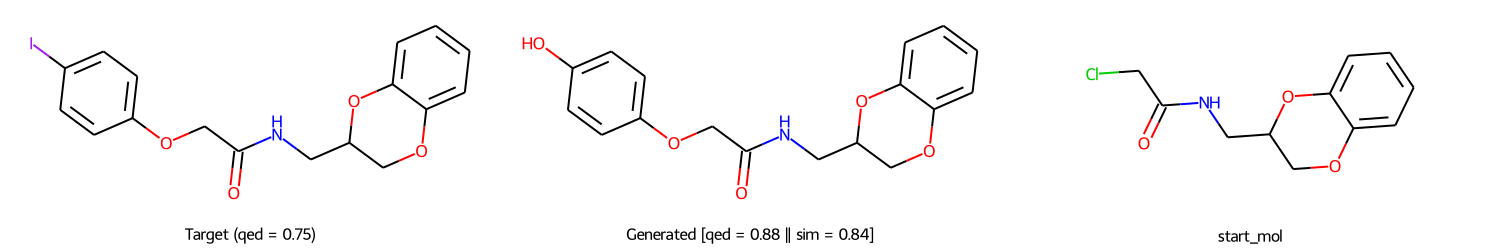

O=C(COC1=CC=C(I)C=C1)NCC1COC2=CC=CC=C2O1 || O=C(COc1ccc(Br)cc1)NCC1COc2ccccc2O1


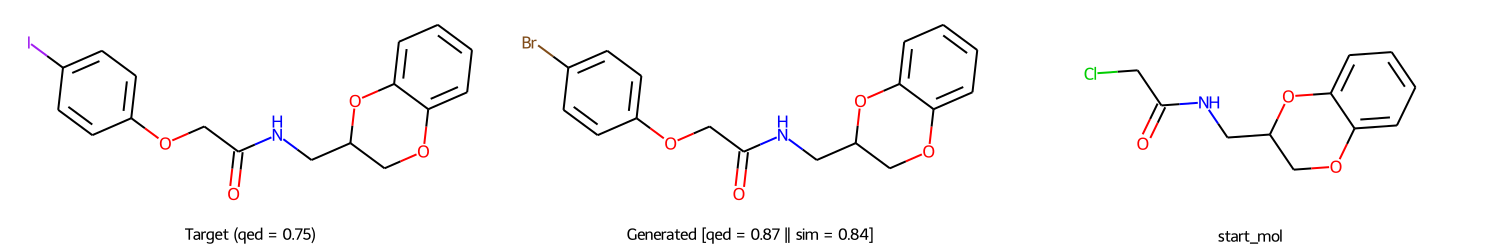

O=C(COC1=CC=C(I)C=C1)NCC1COC2=CC=CC=C2O1 || Nc1ccc(OCC(=O)NCC2COc3ccccc3O2)cc1


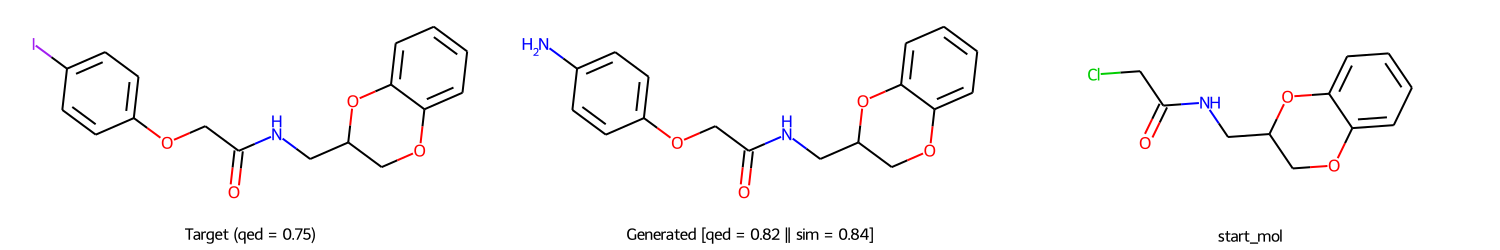

CC1(C)C2CCC1(CS(=O)(=O)NCCCO)C(=O)C2 || CC1(C)[C@@H]2CC[C@@]1(CS(=O)(=O)NCCO)C(=O)C2


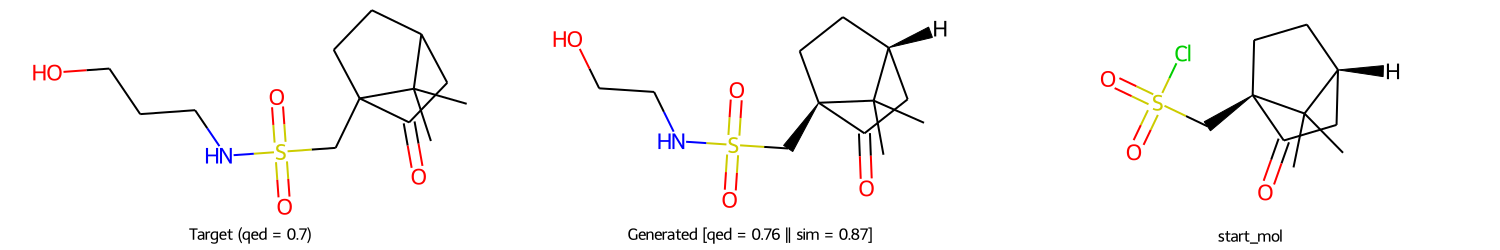

CC(=O)CCC1=CC=C(OCC(=O)N2CCOC3CCCCC32)C=C1 || CC(=O)Cc1ccc(OCC(=O)N2CCO[C@@H]3CCCC[C@H]32)cc1


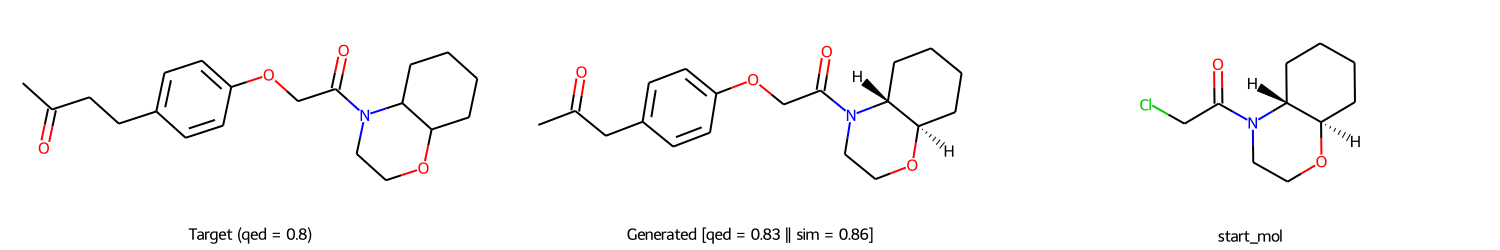

CC(=O)CCC1=CC=C(OCC(=O)N2CCOC3CCCCC32)C=C1 || O=C(O)Cc1ccc(OCC(=O)N2CCO[C@@H]3CCCC[C@H]32)cc1


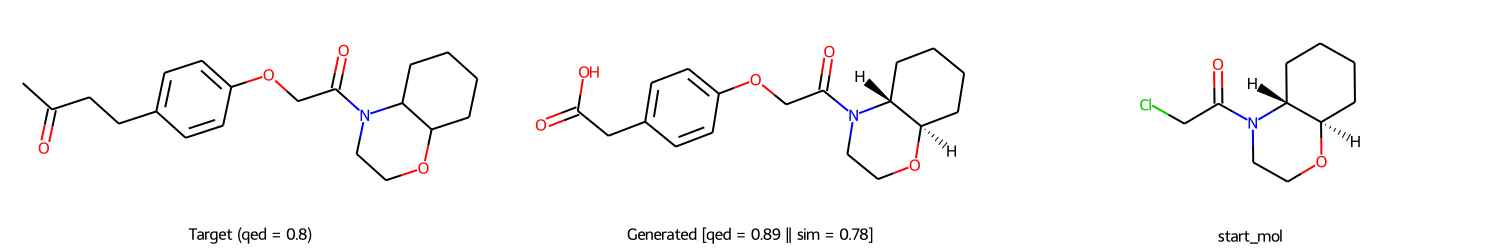

CC(=O)CCC1=CC=C(OCC(=O)N2CCOC3CCCCC32)C=C1 || CCCc1ccc(OCC(=O)N2CCO[C@@H]3CCCC[C@H]32)cc1


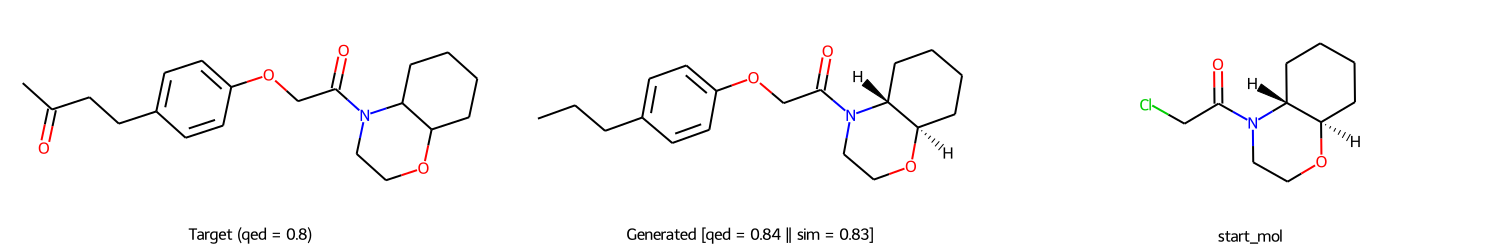

CC(=O)CCC1=CC=C(OCC(=O)N2CCOC3CCCCC32)C=C1 || CCc1ccc(OCC(=O)N2CCO[C@@H]3CCCC[C@H]32)cc1


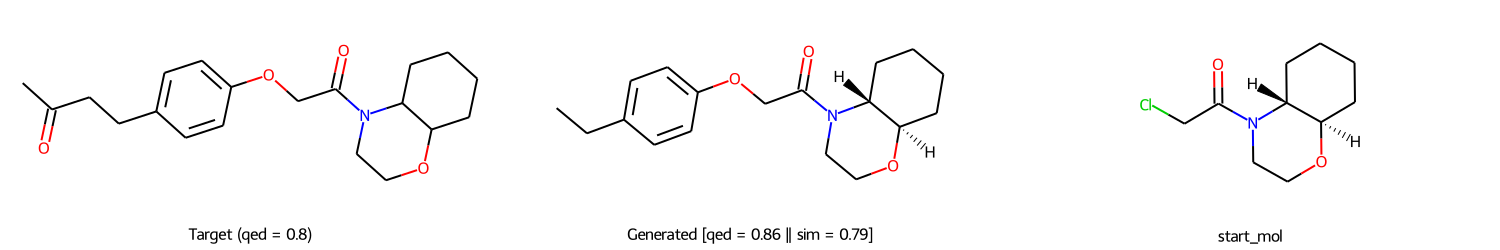

CC(=O)CCC1=CC=C(OCC(=O)N2CCOC3CCCCC32)C=C1 || CC(O)Cc1ccc(OCC(=O)N2CCO[C@@H]3CCCC[C@H]32)cc1


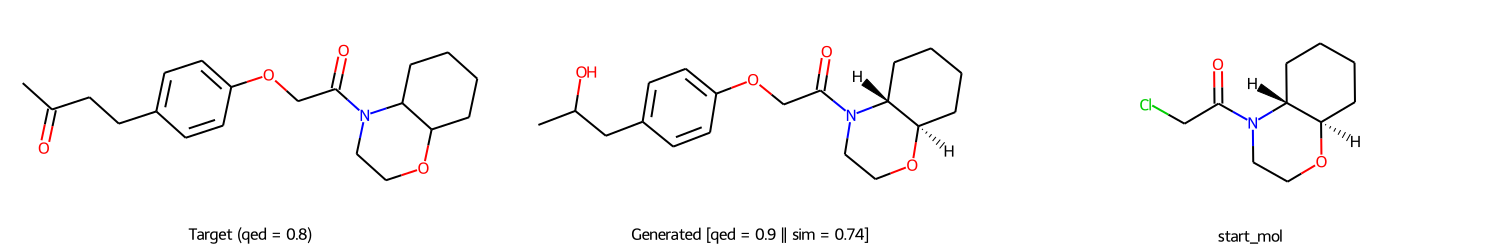

CC(=O)CCC1=CC=C(OCC(=O)N2CCOC3CCCCC32)C=C1 || O=C(COc1ccc(O)cc1)N1CCO[C@@H]2CCCC[C@H]21


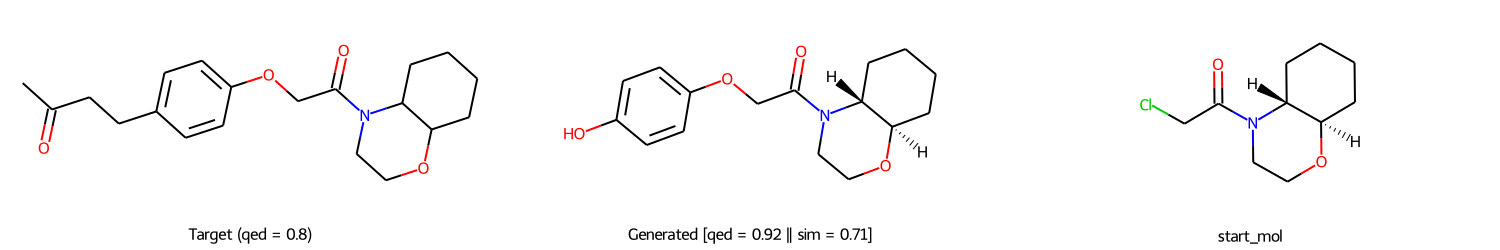

CC1CC1C1=CC=C(CCC(=O)N2CCCC(CNS(C)(=O)=O)C2)O1 || CNCC1CCCN(C(=O)CCc2ccc(C3CC3C)o2)C1


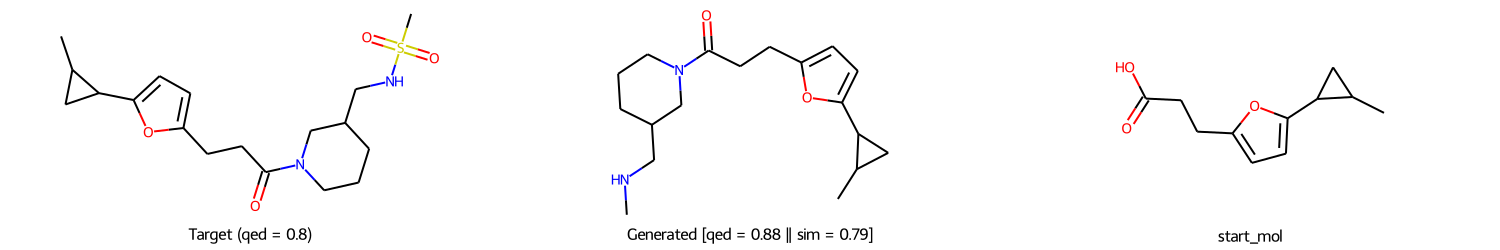

CC1CC1C1=CC=C(CCC(=O)N2CCCC(CNS(C)(=O)=O)C2)O1 || CC1CC1c1ccc(CCC(=O)N2CCCC(CN)C2)o1


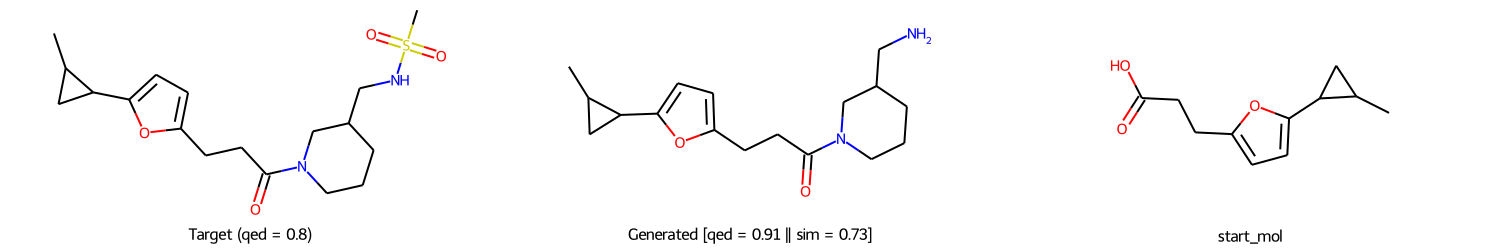

CC1CC1C1=CC=C(CCC(=O)N2CCCC(CNS(C)(=O)=O)C2)O1 || CC1CC1c1ccc(CCC(=O)N2CCCC(CS(N)(=O)=O)C2)o1


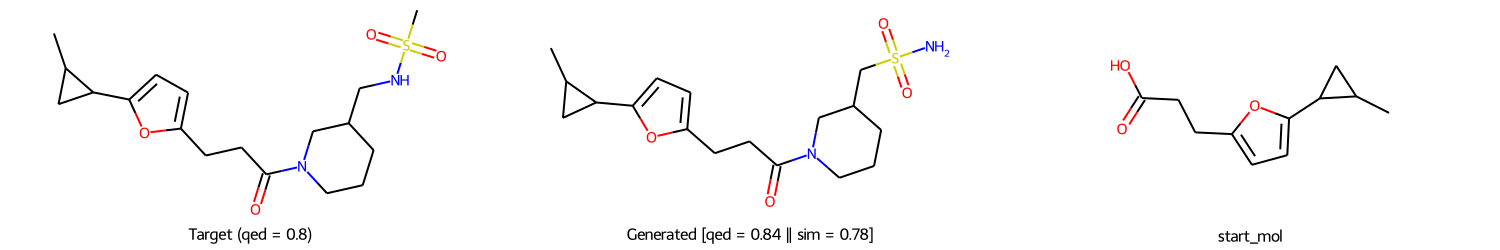

O=C(CCC1=NC2=CC=CC=C2C(=O)N1)NC1CCC2=CC=CC=C21 || O=C(CCc1nc2ccccc2c(=O)[nH]1)NC1CCCc2ccccc21


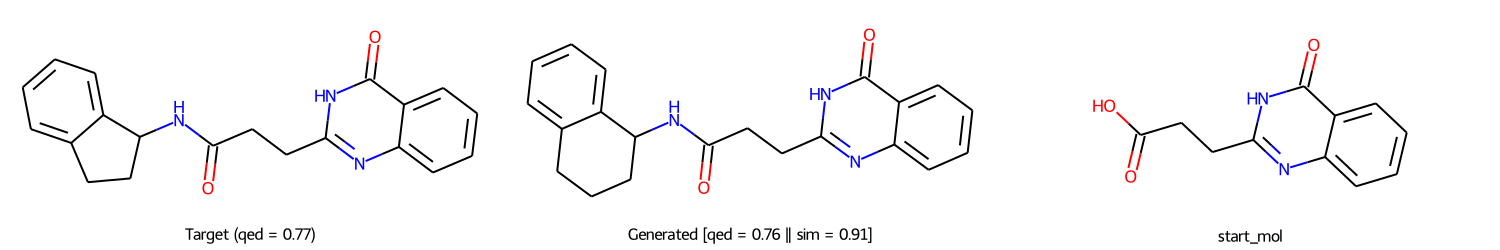

CC(OC(=O)C1CCN(C(=O)C(C)(C)C)CC1)C(=O)NC1=CC=C2OCOC2=C1 || CC(C)(C)C(=O)N1CCC(C(=O)Nc2ccc3c(c2)OCO3)CC1


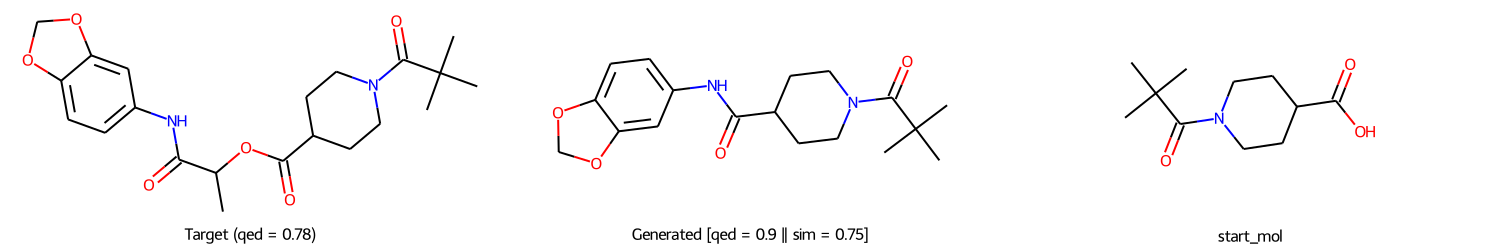

C[NH+]1CCC(NC(=O)C(=O)NC2=CC=C(OC3CCCC3)C=C2)CC1 || O=C(Nc1ccc(OC2CCCC2)cc1)C(=O)NC1CCCC1


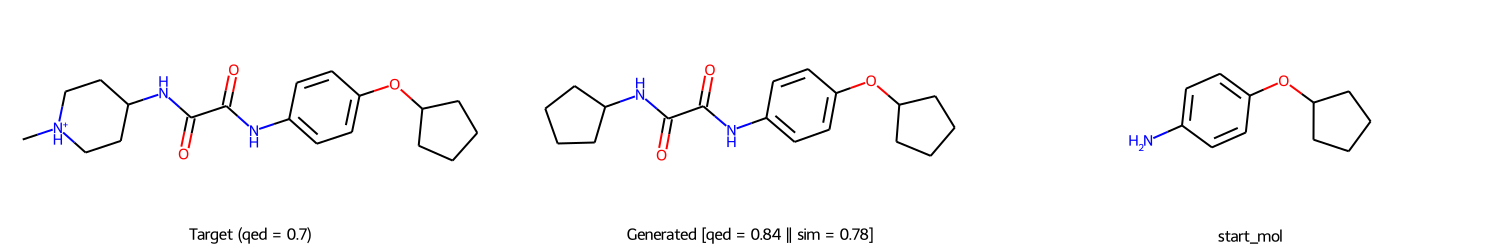

CC1=CC=C(S(=O)(=O)N2CCC(C(=O)N3CCCC4=CC=CC=C43)CC2)C=C1C || Cc1ccc(S(=O)(=O)N2CCC(C(=O)N3CCCc4ccccc43)CC2)cc1S


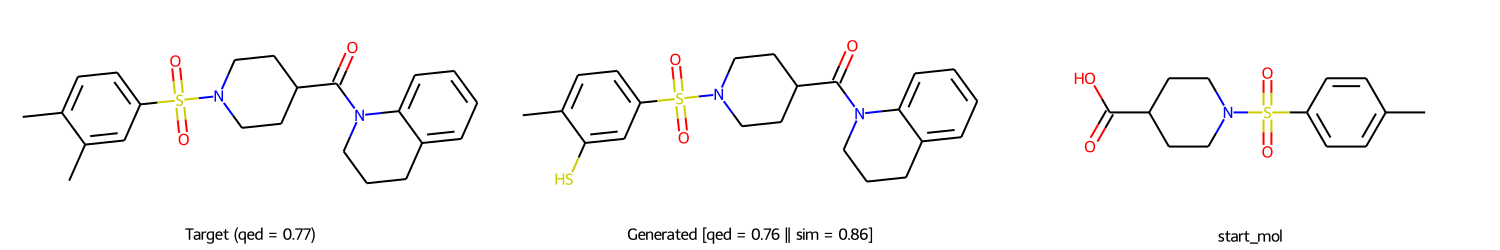

CC1=CC=C(S(=O)(=O)N2CCC(C(=O)N3CCCC4=CC=CC=C43)CC2)C=C1C || Cc1cc(S(=O)(=O)N2CCC(C(=O)N3CCCc4ccccc43)CC2)ccc1S


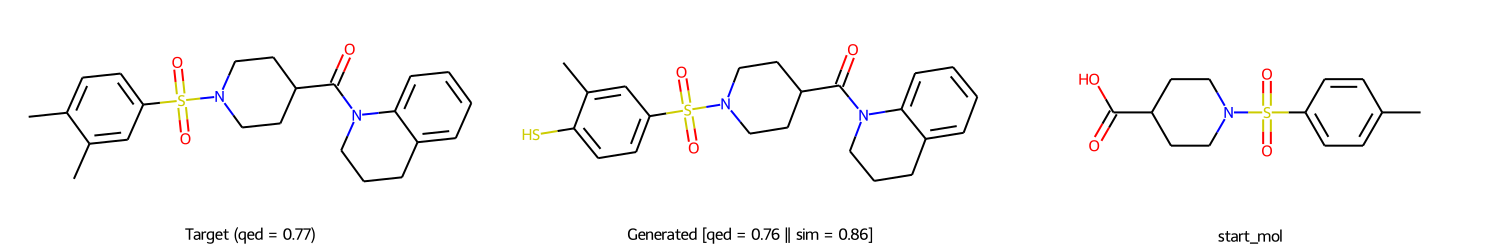

CC(=O)NCCNC(=O)C1=C(C2CC2)N(C2=CC=C(C)C(Cl)=C2)N=C1 || CNC(=O)c1cnn(-c2ccc(C)c(Cl)c2)c1C1CC1


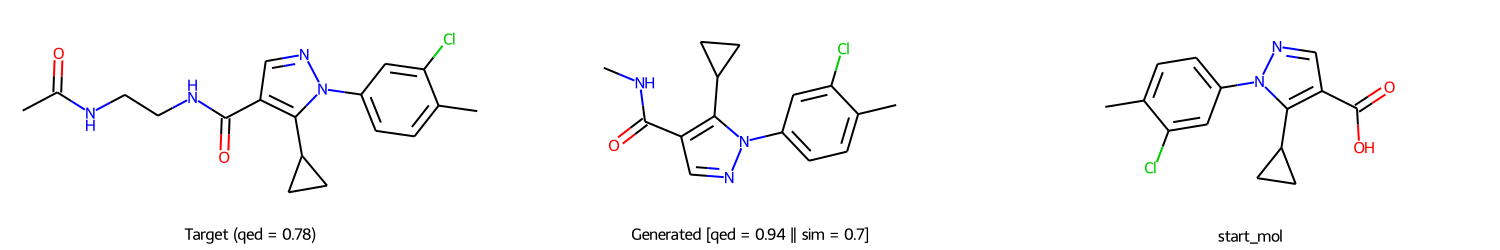

CC1=NN=C(CC2=CC=C(NC(=O)C3=CC=C(N4CCOCC4)C=C3)C=C2)O1 || Cc1ccc(NC(=O)c2ccc(N3CCOCC3)cc2)cc1


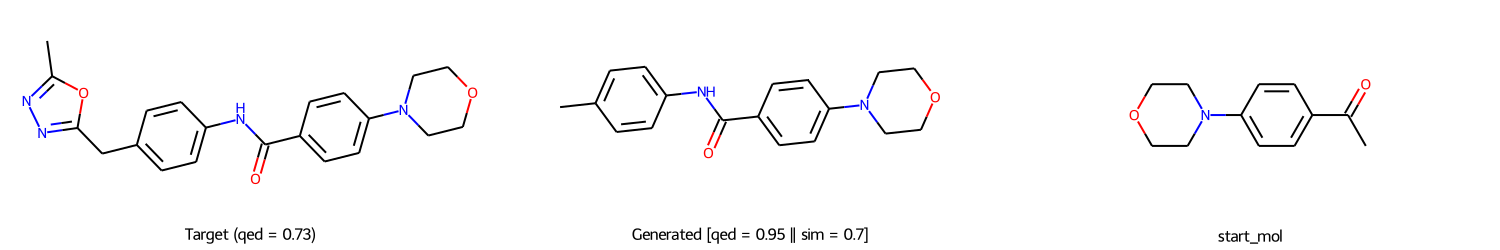

CC1=NN=C(CC2=CC=C(NC(=O)C3=CC=C(N4CCOCC4)C=C3)C=C2)O1 || O=C(Nc1ccc(CO)cc1)c1ccc(N2CCOCC2)cc1


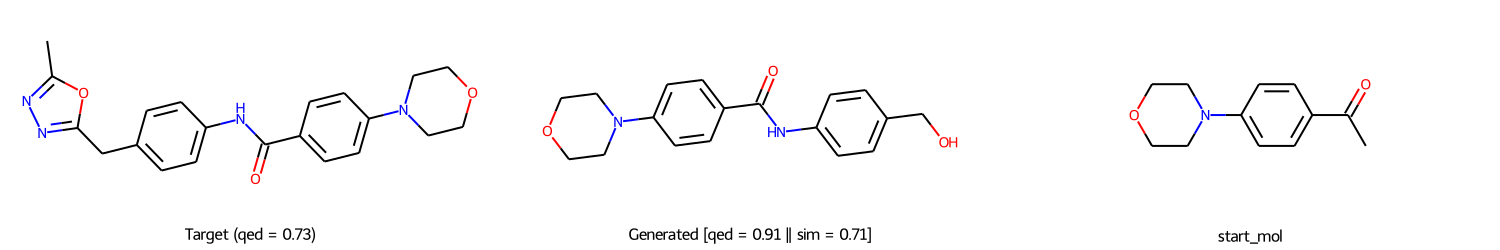

CC1=NN=C(CC2=CC=C(NC(=O)C3=CC=C(N4CCOCC4)C=C3)C=C2)O1 || CCCc1ccc(NC(=O)c2ccc(N3CCOCC3)cc2)cc1


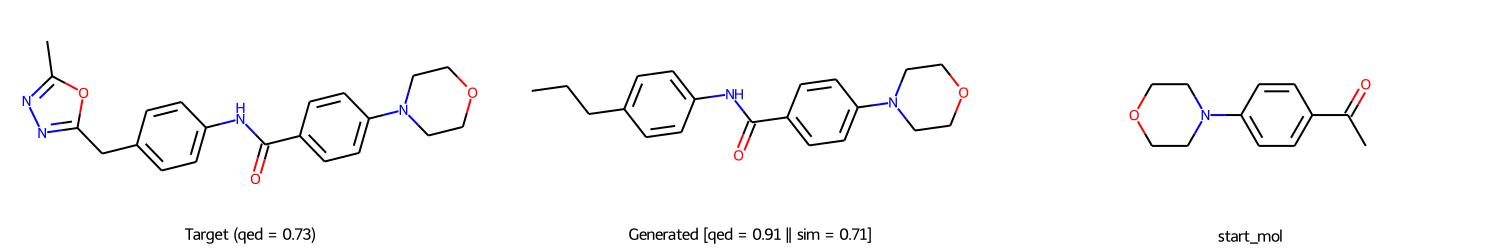

CCCCC1=NN=C(NC(=O)C2CCN(S(=O)(=O)C3=CC=C(C)C=C3)CC2)S1 || CCc1nnc(NC(=O)C2CCN(S(=O)(=O)c3ccc(C)cc3)CC2)s1


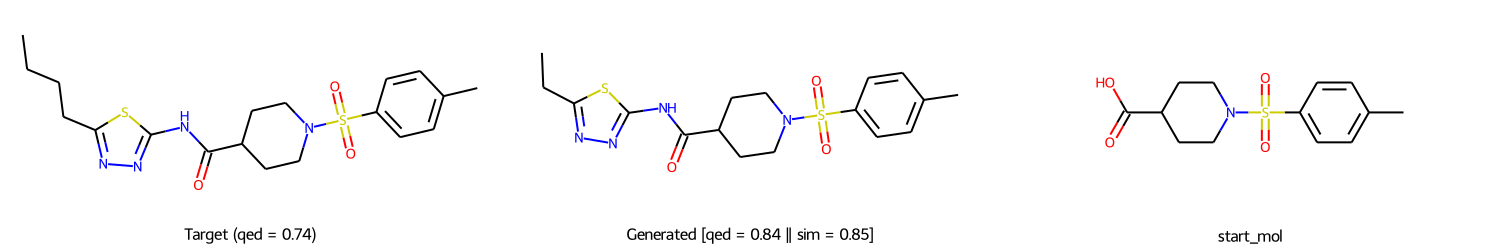

CCCCC1=NN=C(NC(=O)C2CCN(S(=O)(=O)C3=CC=C(C)C=C3)CC2)S1 || Cc1ccc(S(=O)(=O)N2CCC(C(=O)Nc3nnc(C)s3)CC2)cc1


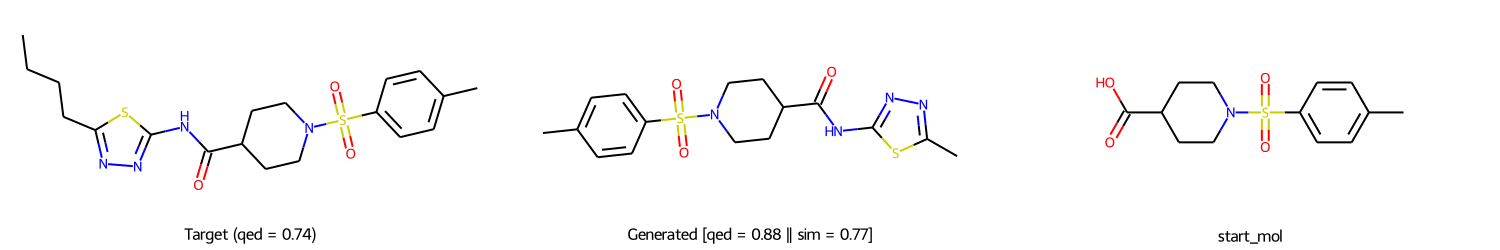

CC1=CC=C(NC(=O)CNC2=CC=C(C(=O)N3CC(C)OC(C)C3)C=C2)C(Br)=C1 || Cc1ccc(NC(=O)CNc2ccc(C(=O)N3CC(C)OC(C)C3)cc2)c(C)c1


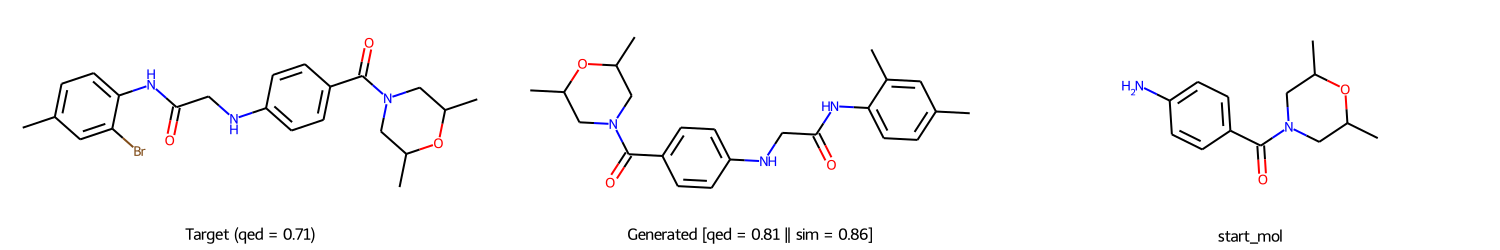

CC1=CC=C(NC(=O)CNC2=CC=C(C(=O)N3CC(C)OC(C)C3)C=C2)C(Br)=C1 || Cc1ccc(C)c(NC(=O)CNc2ccc(C(=O)N3CC(C)OC(C)C3)cc2)c1


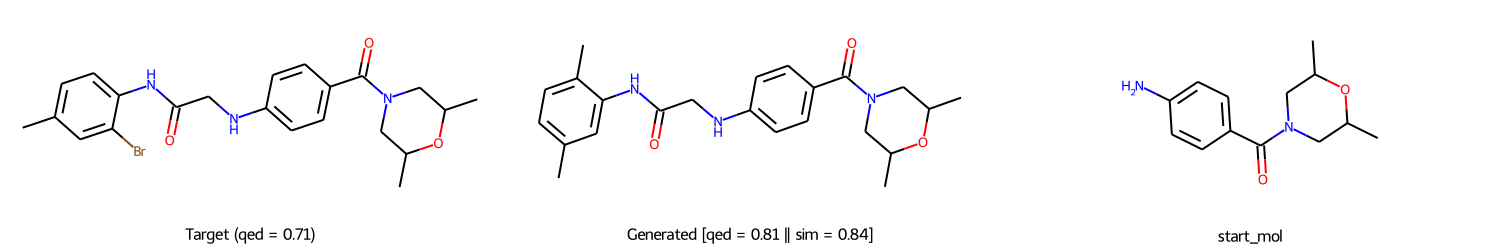

NC1=CC2=C(C=C1NC(=O)N1CCCCC1)OCCCO2 || Nc1cc2c(cc1NC(=O)N1CCCC1)OCCCO2


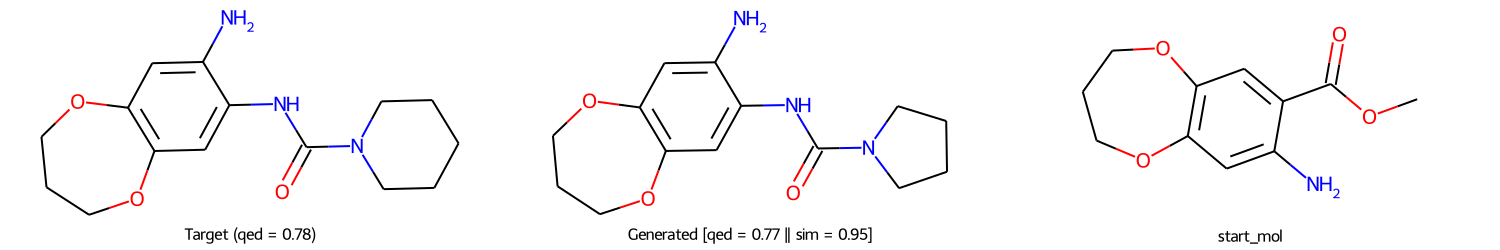

NC1=CC2=C(C=C1NC(=O)N1CCCCC1)OCCCO2 || Nc1cc2c(cc1NC(=O)N1CCCCC1)OCCO2


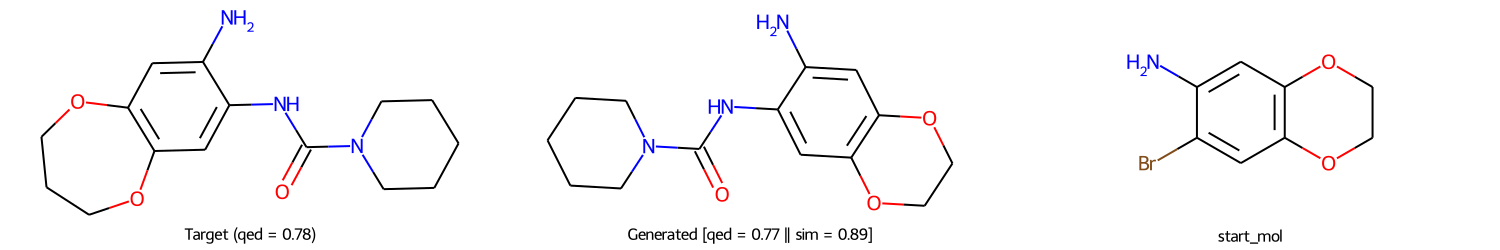

O=C(Cl)COC1=CC=C2CCCC2=C1 || O=C(Cl)COc1ccc2c(c1)CCCC2


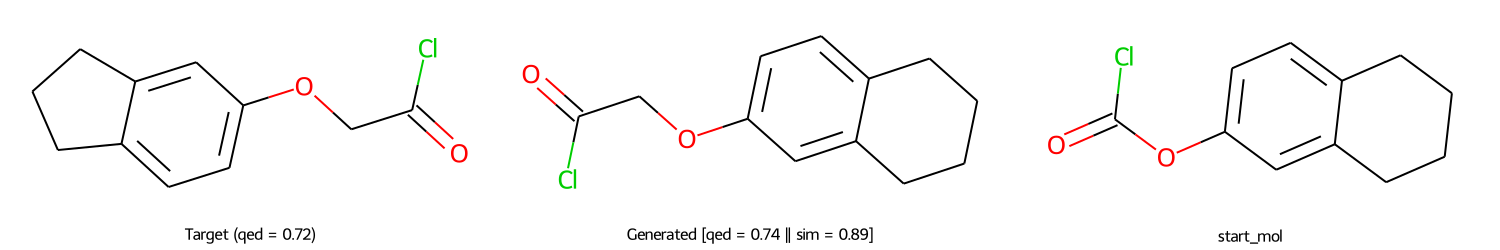

CC(C)(C)C(=O)N1CCCCC1C1CCCCC1=O || CC(C)(C)C(=O)N1CCCCC1C1CCCC1=O


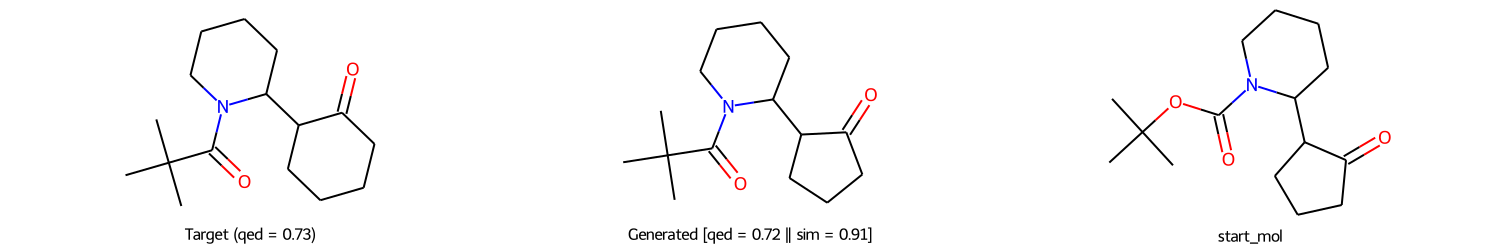

CC(C)(C)C(=O)N1CCCCC1C1CCCCC1=O || CC(C)(C)C(=O)N1CCCC1C1CCCCC1=O


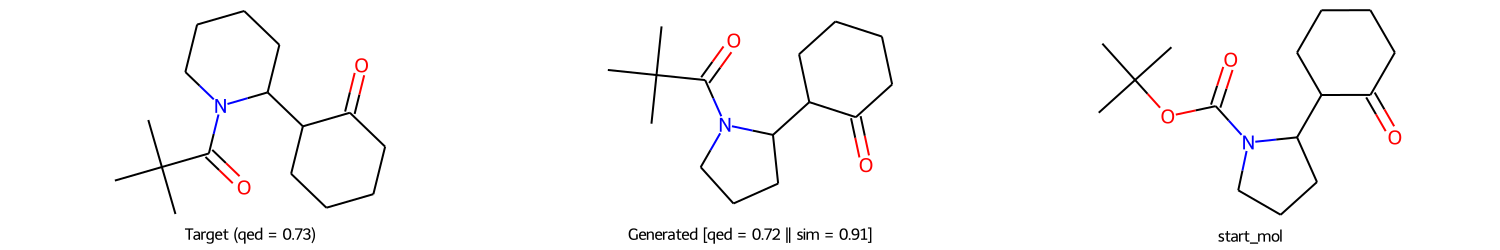

COC1=CC=CC(NC(=O)C2CCCN(S(=O)(=O)C3=CC=C(NC(C)=O)C=C3)C2)=C1 || COc1cccc(NC(=O)C2CCCN(S(=O)(=O)c3ccc(C)cc3)C2)c1


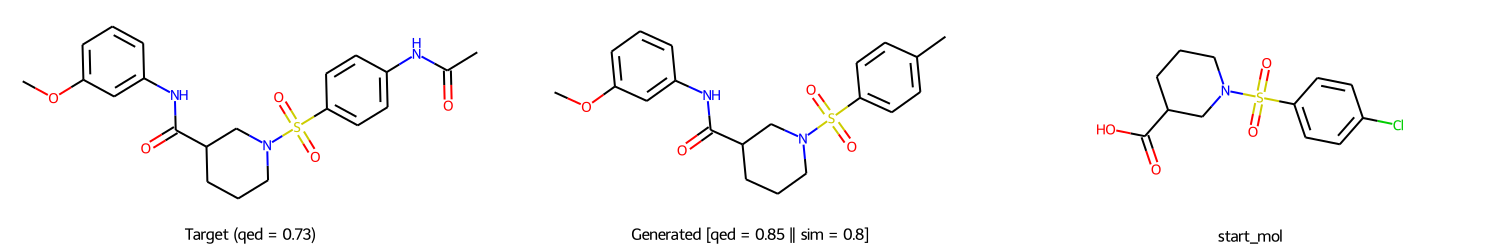

COC1=CC=CC(NC(=O)C2CCCN(S(=O)(=O)C3=CC=C(NC(C)=O)C=C3)C2)=C1 || COc1cccc(NC(=O)C2CCCN(S(=O)(=O)c3ccc(F)cc3)C2)c1


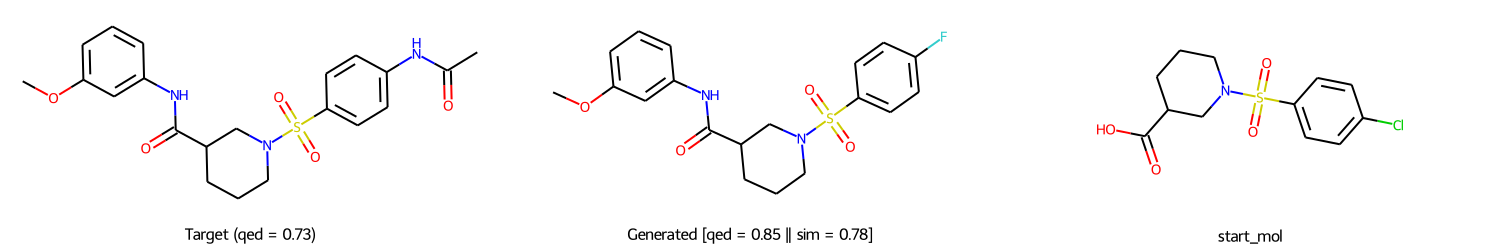

COC1=CC=C(N2CC(C(=O)NC(C)C(=O)NC3CCCC3)CC2=O)C=C1 || COc1ccc(N2CC(C(=O)NC3CCCC3)CC2=O)cc1


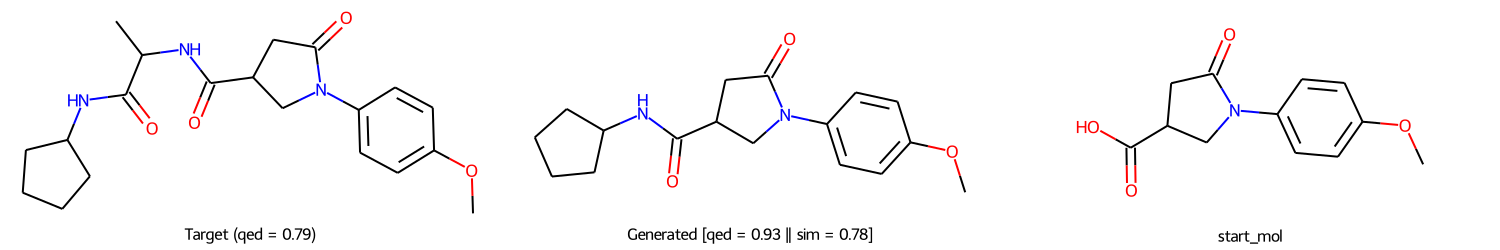

COC1=CC=C(N2CC(C(=O)NC(C)C(=O)NC3CCCC3)CC2=O)C=C1 || COc1ccc(N2CC(C(=O)NC3CCCCC3)CC2=O)cc1


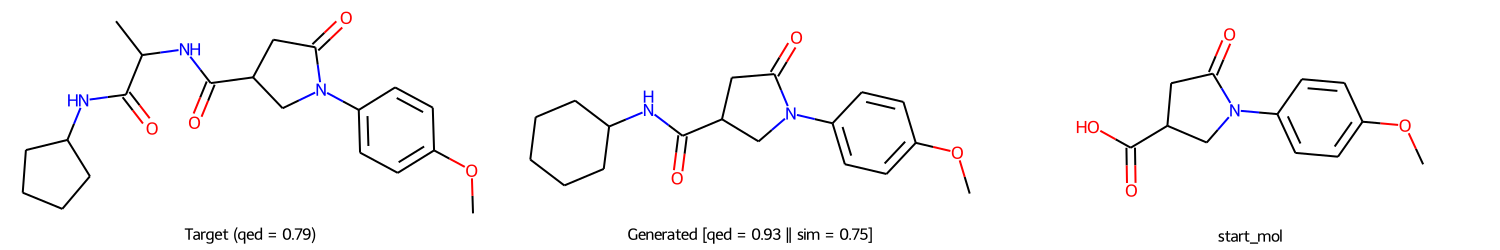

COC1=CC=C(N2CC(C(=O)NC(C)C(=O)NC3CCCC3)CC2=O)C=C1 || COc1ccc(N2CC(C(=O)NC3CCC3)CC2=O)cc1


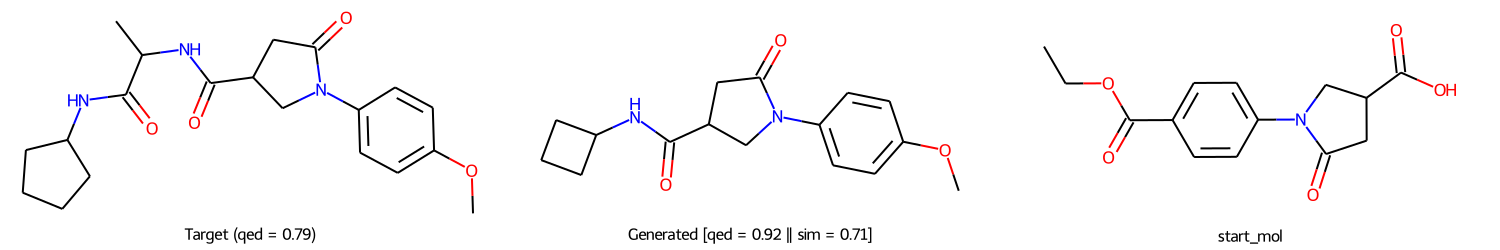

CCC(NC(=O)C1=CC=CC(S(=O)(=O)NC(C)C)=C1)C1=CC=C(C)C=C1 || CCC(NC(=O)c1cccc(C)c1)c1ccc(S(=O)(=O)NC(C)C)cc1


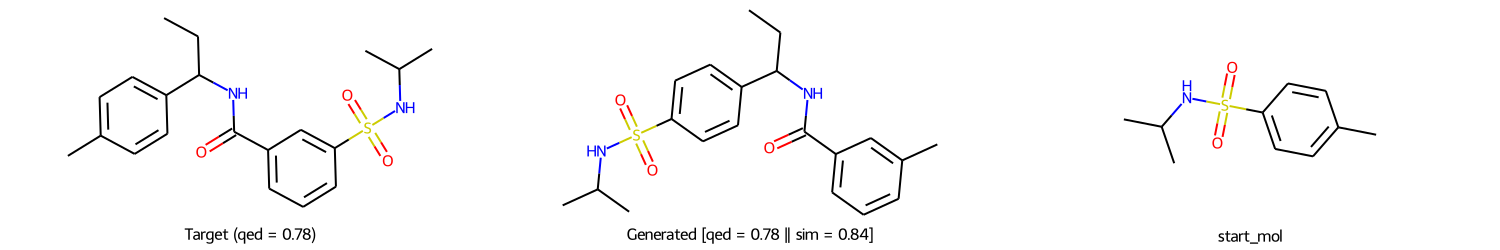

CCC(CCO)CNC(=O)C1=CC=C2NC(=O)COC2=C1 || CCC(CC)CNC(=O)c1ccc2c(c1)OCC(=O)N2


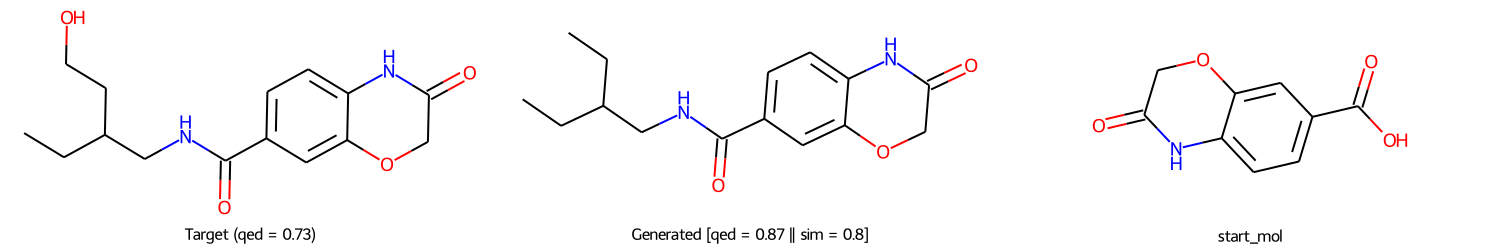

CCC(CCO)CNC(=O)C1=CC=C2NC(=O)COC2=C1 || CCC(CCCl)CNC(=O)c1ccc2c(c1)OCC(=O)N2


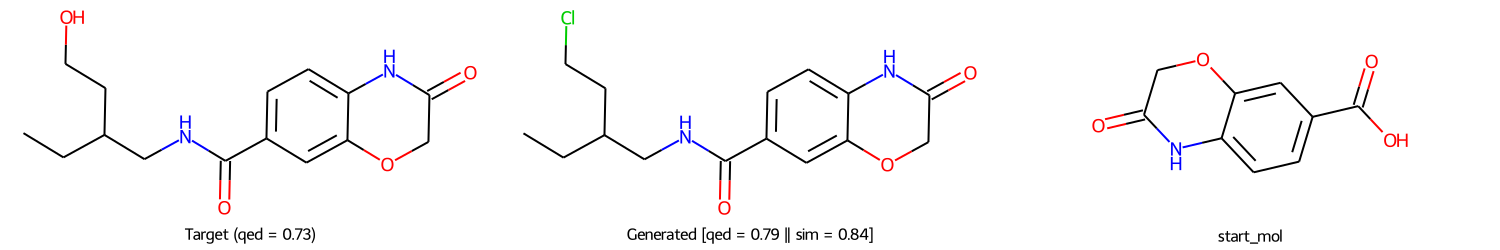

COCCNC(=O)C1CCCN1S(=O)(=O)C1=CC=C(Br)C=C1 || COCCNC(=O)C1CCCCN1S(=O)(=O)c1ccc(Br)cc1


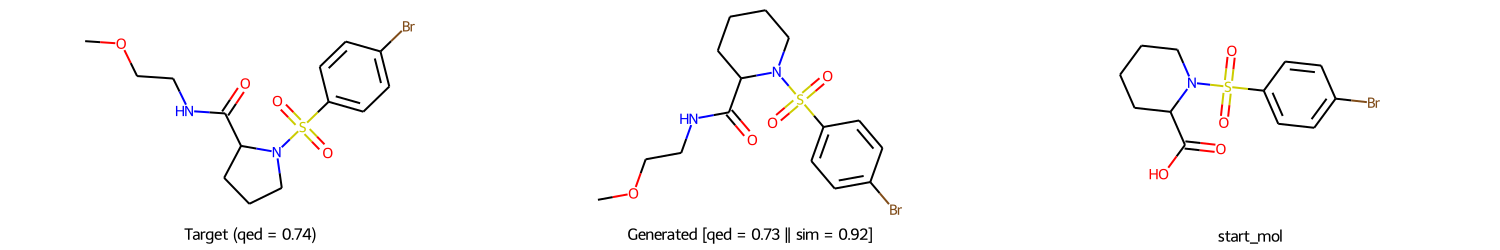

CC(C)C1=CC(Br)=CC=C1OCC(=O)NC1=CC=C(C(=O)N2CCOCC2)C=C1 || CC(C)c1cc(F)ccc1OCC(=O)Nc1ccc(C(=O)N2CCOCC2)cc1


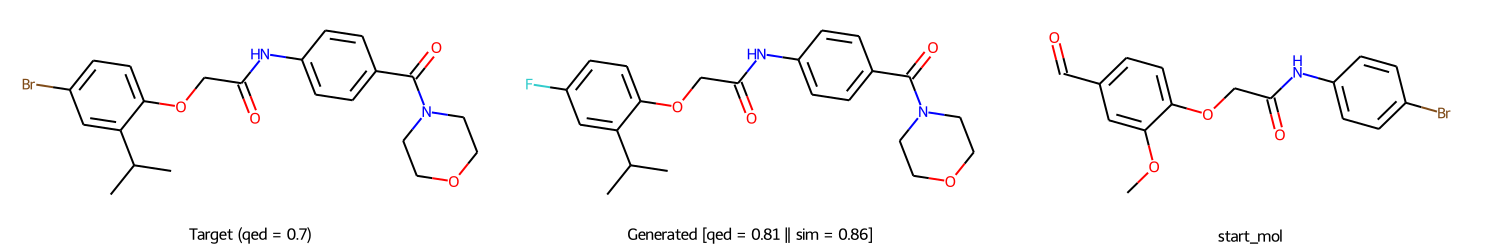

COC1=CC=C(CCCC(=O)NC2=CC=CC(S(N)(=O)=O)=C2)C=C1F || COc1ccc(CCC(=O)Nc2cccc(S(N)(=O)=O)c2)cc1F


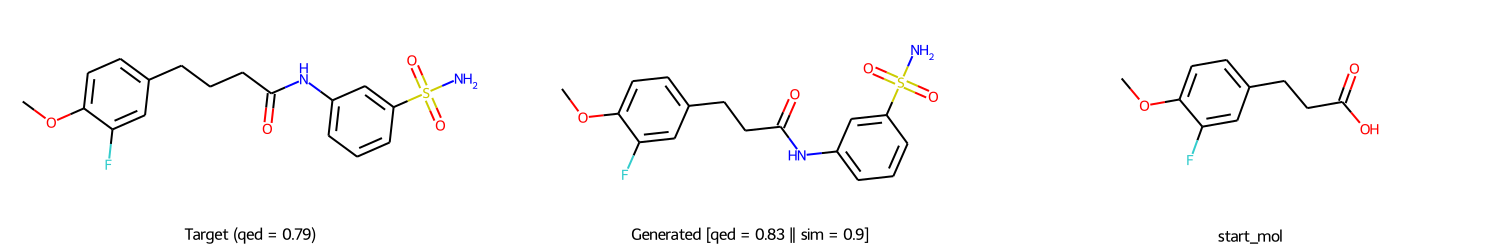

COC1=CC=C(CCCC(=O)NC2=CC=CC(S(N)(=O)=O)=C2)C=C1F || COc1ccc(CCC(=O)Nc2cccc(S(C)(=O)=O)c2)cc1F


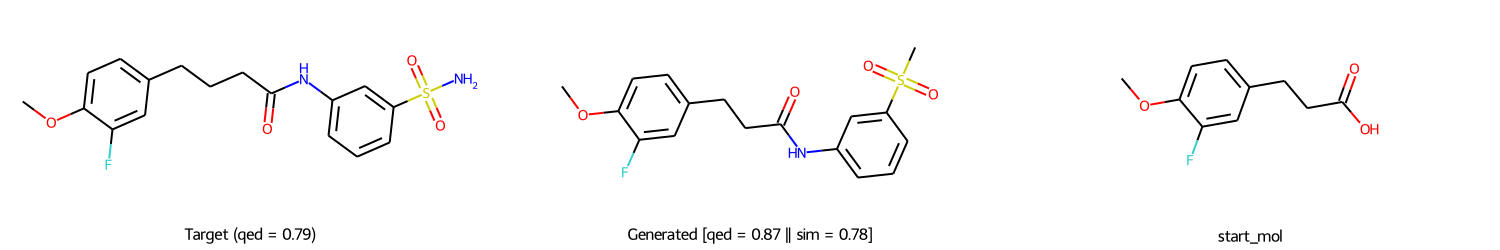

COC1=CC=C(CCCC(=O)NC2=CC=CC(S(N)(=O)=O)=C2)C=C1F || COc1cc(CCC(=O)Nc2cccc(S(N)(=O)=O)c2)ccc1F


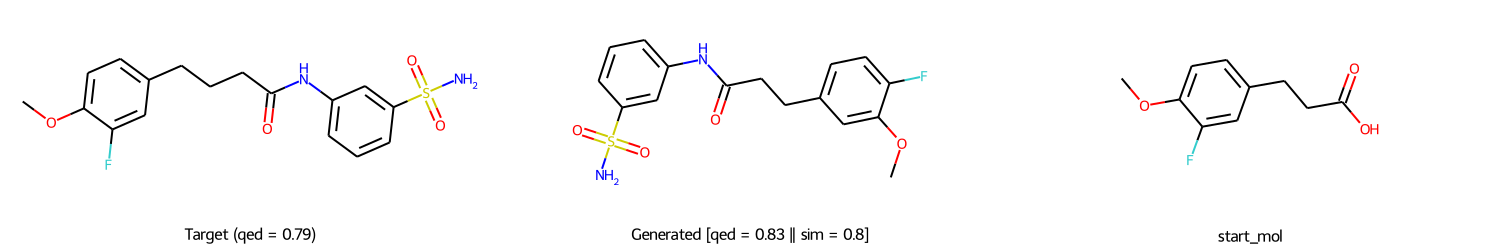

CC1=CC=C(C=CC(=O)N2CCC3(CC2)OCCO3)O1 || CC(O)c1ccc(C=CC(=O)N2CCC3(CC2)OCCO3)o1


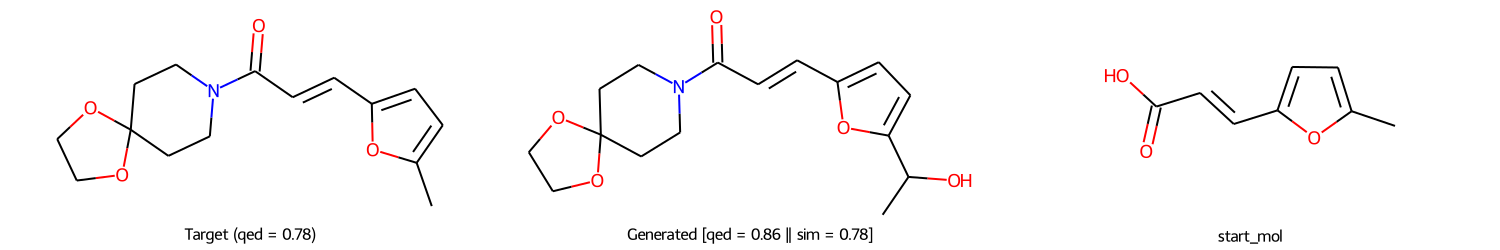

CC(C)C(NS(=O)(=O)C1=CC=CC=C1F)C(=O)N(C)CC1=CC=CC=C1F || Cc1ccccc1CN(C)C(=O)C(NS(=O)(=O)c1ccccc1F)C(C)C


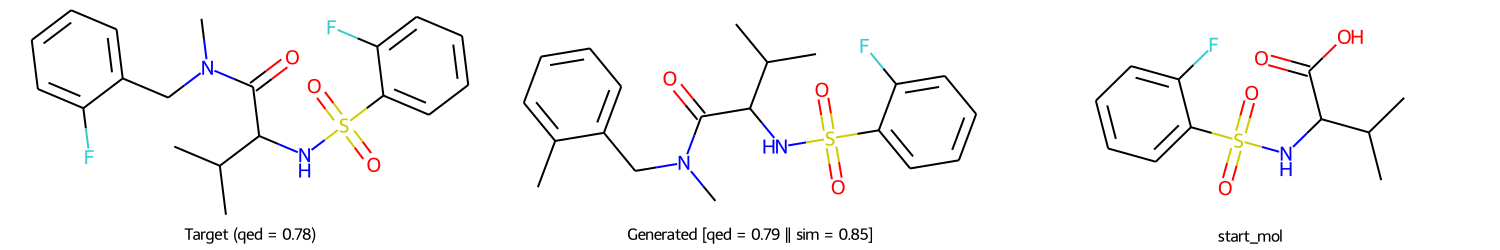

CCN(CC)C(=O)CN(C1=CC=CC=C1)S(=O)(=O)C1=CC=C(C)C=C1 || Cc1ccc(S(=O)(=O)N(CC(N)=O)c2ccccc2)cc1


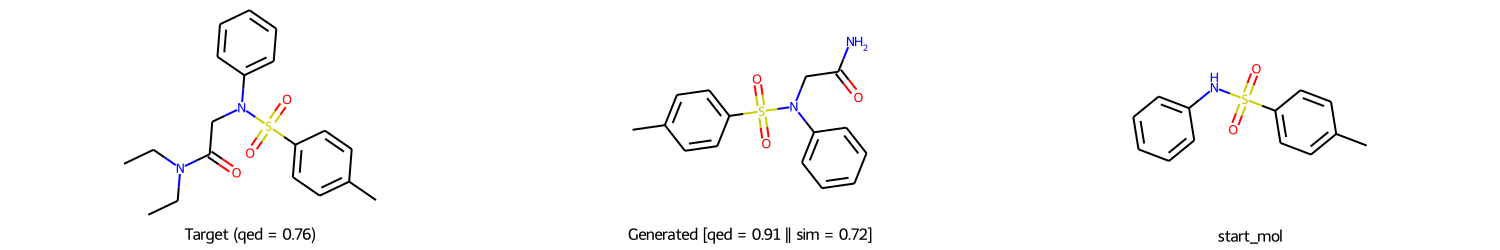

In [8]:
# Choose property to cherry pick for

# PROPERTY_NAME = "drd2"
# SCORING_FT = drd2

PROPERTY_NAME = "qed"
SCORING_FT = qed

# PROPERTY_NAME = "logp04"
# SCORING_FT = penalized_logp

# PROPERTY_NAME = "logp06"
# SCORING_FT = penalized_logp

###############################################################################
###############################################################################
###############################################################################

# Choose desired combination 
x = 1
y = 1
top_perc = 0.9


# Get all files
files = glob.glob(f"results/eval_on_coma_{PROPERTY_NAME}/*")
if PROPERTY_NAME == "drd2":
    files = drd2_files
print(len(files))

# Reorder them because I didn't sort files during generation (ouch)
reorder_idx = np.array(list(map(lambda x: int(x.split("/")[-1].split(".")[0]), files)))

# Get Targets and results
input_smiles = np.array(list(map(lambda x: x.strip(), open(f"datasets/coma/{PROPERTY_NAME}/rdkit_test.txt", 'r').readlines())))[reorder_idx]
res = pickle.load(open(f"results/best_{PROPERTY_NAME}/{x}sim_{y}{PROPERTY_NAME}.pickle", 'rb'))

# Get all property values
sim = np.array(res["sim"])
prop = np.array(res["prop"])
in_smiles = np.array([[x]* 20 for x in input_smiles]).reshape(-1)
out_smiles = np.array(res["smiles"])

# Sample a few best ones
desire = x*sim + y*prop
idx_of_desire = (desire > top_perc*desire.max()) & (sim!=1)
print("Displaying", idx_of_desire.sum(), "pairs.")

# Display
for i, target_smile, generated_smile, p, s in zip(np.arange(len(idx_of_desire))[idx_of_desire], in_smiles[idx_of_desire], out_smiles[idx_of_desire], prop[idx_of_desire], sim[idx_of_desire]):
    target_mol = Chem.MolFromSmiles(target_smile)
    generated_mol = Chem.MolFromSmiles(generated_smile)
    print(target_smile, "||", generated_smile)
    start_mol = Chem.MolFromSmiles(get_start_mol(i, generated_smile))
    leg1 = f"Target ({PROPERTY_NAME} = {round(SCORING_FT(target_smile), 2)})"
    leg2 = f"Generated [{PROPERTY_NAME} = {round(p, 2)} || sim = {round(s, 2)}]"
    display(Chem.Draw.MolsToGridImage((target_mol, generated_mol, start_mol), subImgSize=(500, 250), legends=[leg1, leg2, "start_mol"]))

In [10]:
Chem.CanonSmiles("CC(O)c1ccc(C=CC(=O)N2CCC3(CC2)OCCO3)o1")

'CC(O)c1ccc(C=CC(=O)N2CCC3(CC2)OCCO3)o1'